<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/LoanTap%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

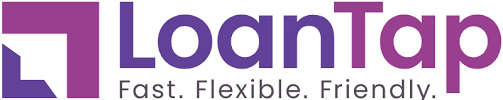

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

# **Business Problem**

* The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals
* In this case study will focus on the underwriting process behind Personal Loan only
* Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations


# **Desired Outcome of Analysis**
* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
* Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)
* Check correlation among independent variables and how they interact with each other
* Simple Feature Engineering steps:
E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:
1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies
* Missing values and Outlier Treatment
* Scaling - Using MinMaxScaler or StandardScaler
* Use Logistic Regression Model from Sklearn/Statsmodel library and explain the results
* Results Evaluation:
** Classification Report
** ROC AUC curve
** Precision recall curve
* Tradeoff Questions:
** How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
** Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
* Provide actionable Insights & Recommendations

# **Loading Modules and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import  kstest
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import spearmanr
from scipy.stats import shapiro,levene
from statsmodels.graphics.gofplots import qqplot

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


In [2]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 45.5MB/s] 


In [3]:
data = pd.read_csv("logistic_regression.csv")

**Description of each column in data**
* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

In [ ]:
data.shape

(396030, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# **Statistical Analysis,Graphical Visualization & Insights**

### Term

In [ ]:
data["term"].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

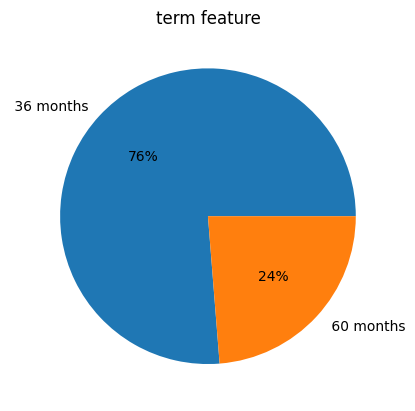

In [ ]:
plt.pie(x = data["term"].value_counts().reset_index()["term"],
        labels = data["term"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("term feature")
plt.show()

* 76% of the Loans are having payment term as 36 Months
* Rest 24% have payment term as 60 Monthd

### loan_amnt

<Axes: xlabel='loan_amnt', ylabel='Count'>

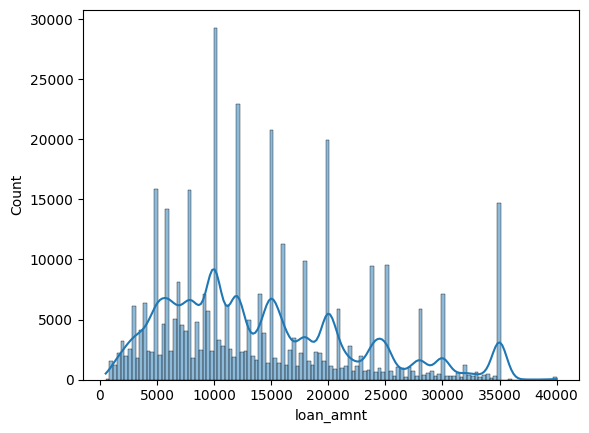

In [ ]:
sns.histplot(data["loan_amnt"],kde = True )

In [ ]:
data["loan_amnt"].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

* Loan Amount Range from 500 ~ 40000
* We can see high spikes of count in the loan amount at multiples of 5000
* However 75% amount of loan lie between 0 ~ 20000

### int_rate

<Axes: xlabel='int_rate', ylabel='Count'>

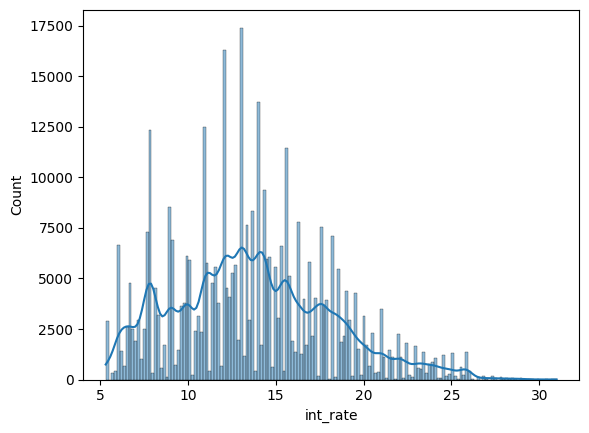

In [ ]:
sns.histplot(data["int_rate"],kde = True )

In [ ]:
data["int_rate"].describe()

count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64

In [ ]:
data[["loan_amnt","int_rate"]].corr()

,loan_amnt,int_rate
loan_amnt,1.000000,0.168921
int_rate,0.168921,1.000000


<Axes: xlabel='loan_amnt', ylabel='int_rate'>

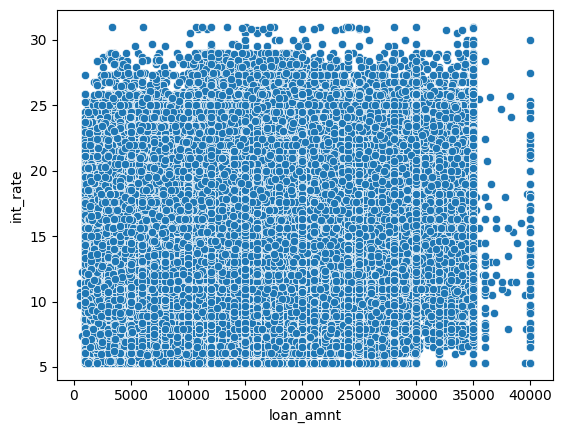

In [ ]:
sns.scatterplot(data=data,x = "loan_amnt", y= "int_rate")

* "int_rate" Range from 5.32 ~ 30.99
* However "int_rate" for 75% loans lie between 5.32 ~ 16.49
* There is not much relationship between "loan_amnt" and "int_rate"

### Installment

<Axes: xlabel='installment', ylabel='Count'>

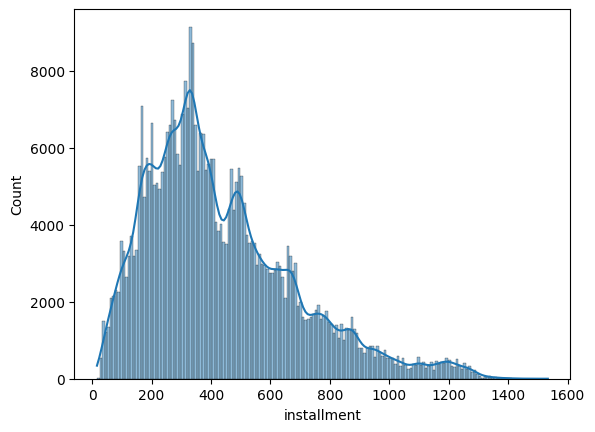

In [ ]:
sns.histplot(data["installment"],kde = True )

In [ ]:
data["installment"].describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

In [ ]:
data[["loan_amnt","int_rate","installment"]].corr()

,loan_amnt,int_rate,installment
loan_amnt,1.000000,0.168921,0.953929
int_rate,0.168921,1.000000,0.162758
installment,0.953929,0.162758,1.000000


<Axes: xlabel='loan_amnt', ylabel='int_rate'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


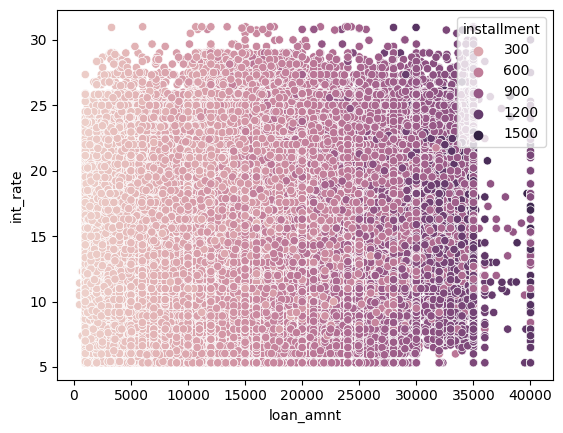

In [ ]:
sns.scatterplot(data=data,x = "loan_amnt", y= "int_rate",hue="installment")

* "installment" Range from 16 ~ 1533
* However "installment" for 75% loans lie < 567
* Installment and loan_amnt have high Correlation
* Installment and int_rate have low correlation

### grade

In [ ]:
data["grade"].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

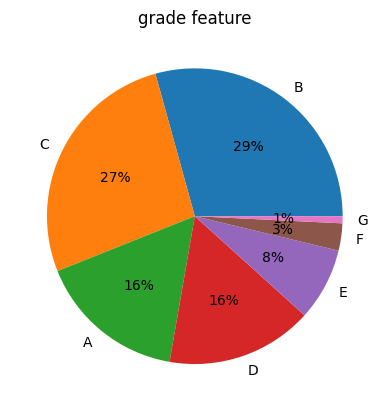

In [ ]:
plt.pie(x = data["grade"].value_counts().reset_index()["grade"],
        labels = data["grade"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("grade feature")
plt.show()

<Axes: xlabel='int_rate', ylabel='Density'>

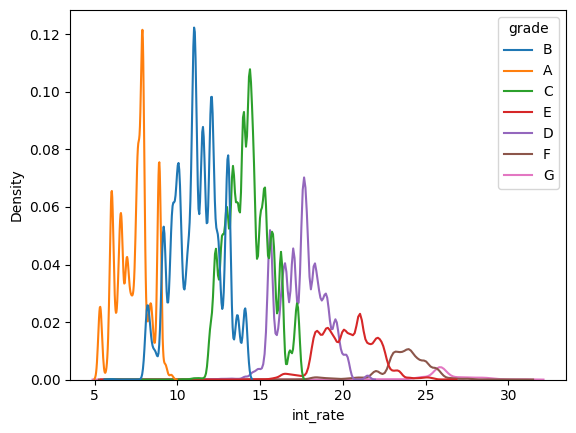

In [ ]:
sns.kdeplot(data=data, hue="grade",x="int_rate")

* 7 Types of grade have been assigned for each loan from A ~ G
* highest number of Loans are classified as Grade B and very less no of loan avaiable in Grade G
* "int_rate" approximately increase from A to G

### sub_grade

<Axes: xlabel='sub_grade', ylabel='count'>

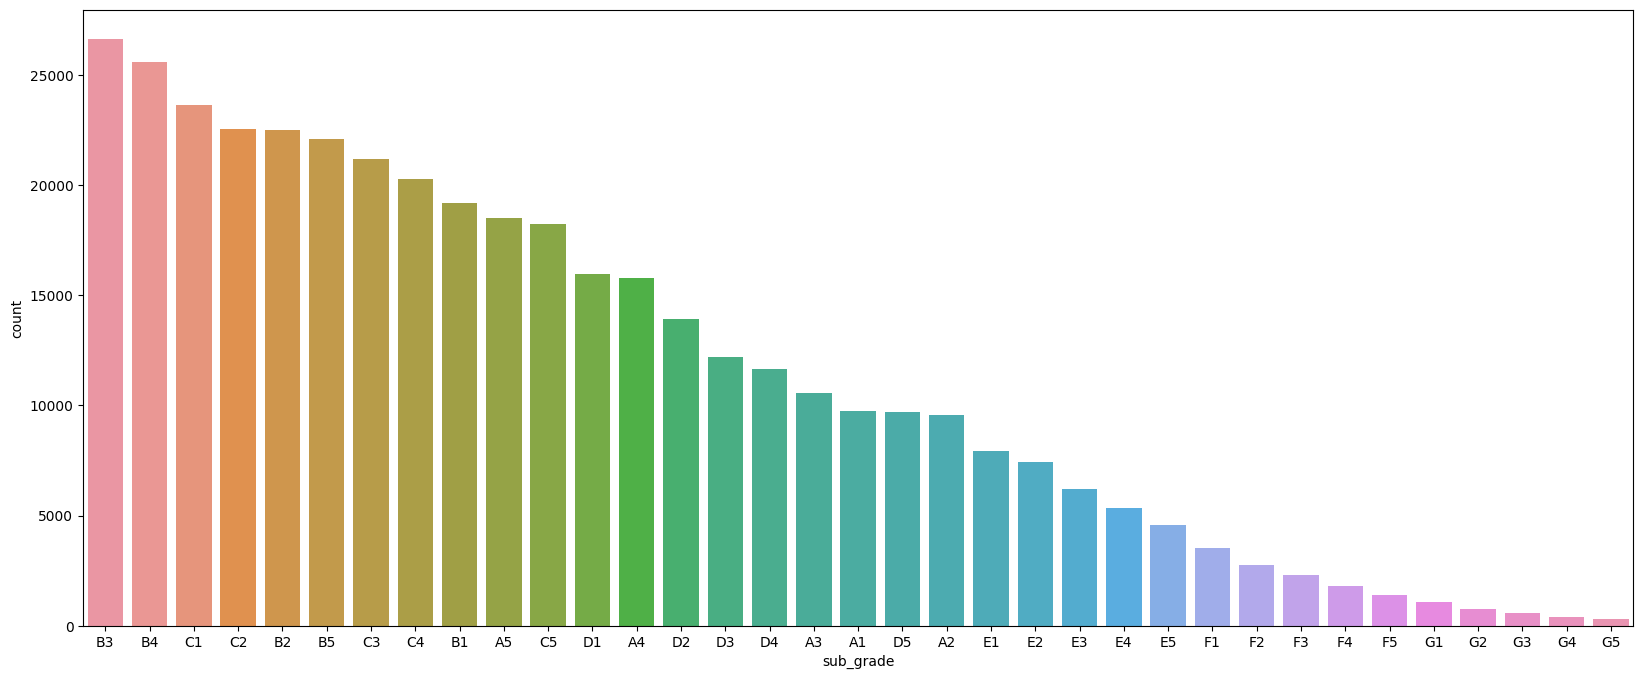

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data=data, x= "sub_grade" ,order = data["sub_grade"].value_counts().index)

* Each grade is sub divided into 5 subgrades
* Maximum loans are of B3 Grade and Minium loans are of G5

### emp_title

In [ ]:
data["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

* There are 173105 types of emp_title for 393700 loans
* We will further check the influence of these Features
* As different type of Income parametersline debt to Income Ratio, Moratage, Loan, Public_rec_bankruptcies have already been considered, so we can drop this Feature

### emp_length

In [ ]:
data["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [ ]:
data["emp_length"] = data["emp_length"].astype(str).apply(lambda x : x.split(" year")[0])

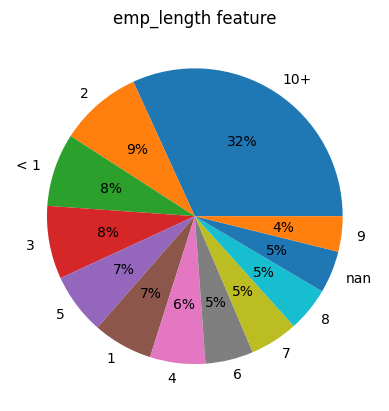

In [ ]:
plt.pie(x = data["emp_length"].value_counts().reset_index()["emp_length"],
        labels = data["emp_length"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("emp_length feature")
plt.show()

* 32% of loans are applicants with Employement length > 10 Years
* 45% of loan are applicants with Employment length < = 5years
* Rest 19% applicants have employment length 5 < x <= 10

### home_ownership

In [ ]:
data["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

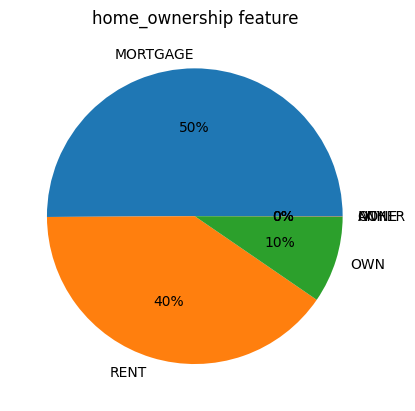

In [ ]:
plt.pie(x = data["home_ownership"].value_counts().reset_index()["home_ownership"],
        labels = data["home_ownership"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("home_ownership feature")
plt.show()

* 50% Applicants are of staying in Mortage Home
* 40% Applicants are staying in Rented Home
* 10 % Applicants are staying in Own House

### annual_inc

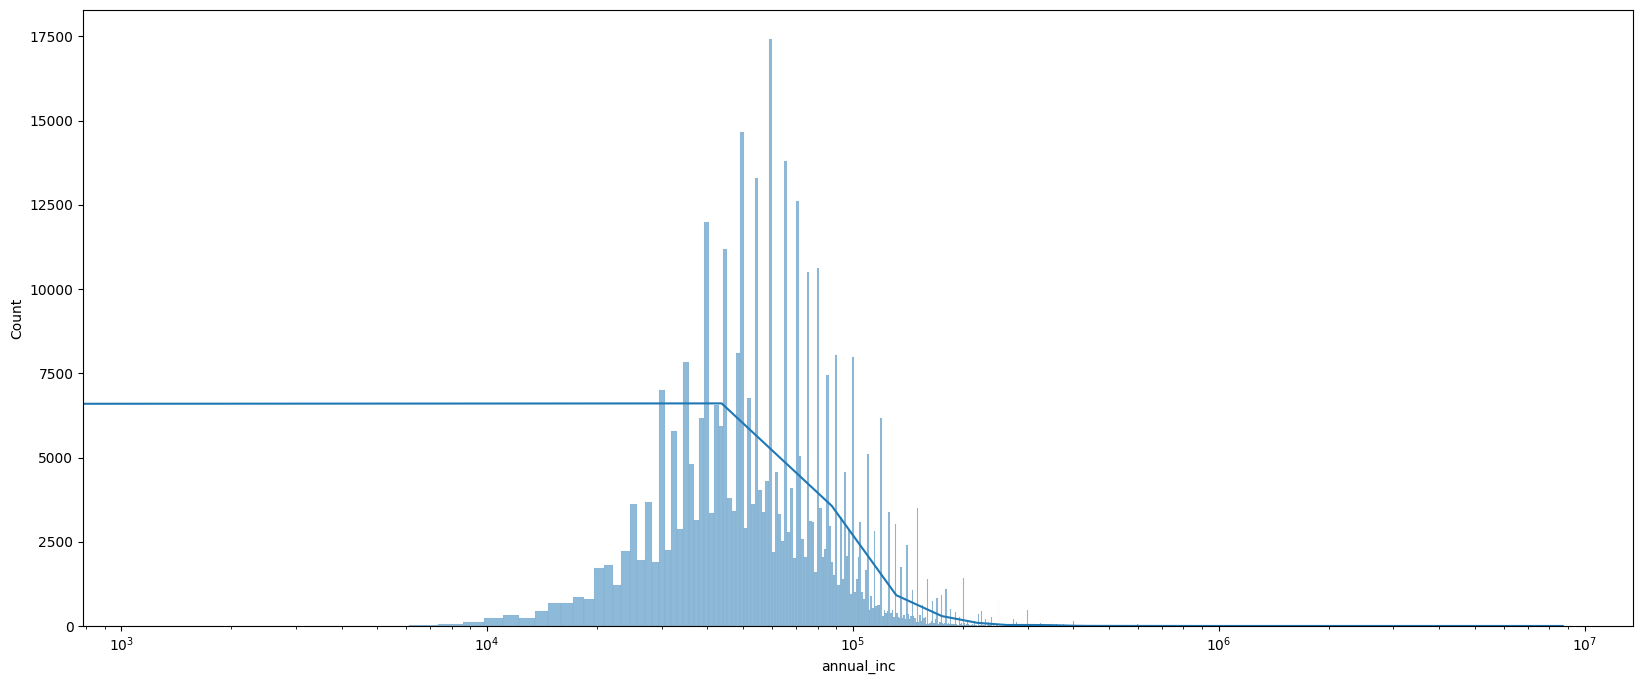

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["annual_inc"],kde = True )
plt.xscale("log")

In [ ]:
data["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

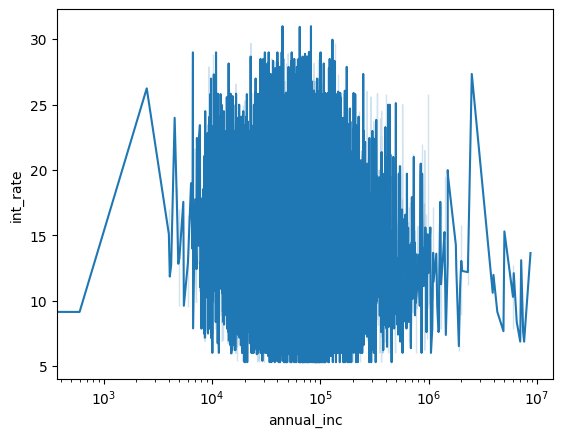

In [ ]:
sns.lineplot(data=data, x= "annual_inc", y="int_rate")
plt.xscale('log')
plt.show()

In [ ]:
data[["annual_inc","int_rate","loan_amnt","installment"]].corr()

,annual_inc,int_rate,loan_amnt,installment
annual_inc,1.000000,-0.056771,0.336887,0.330381
int_rate,-0.056771,1.000000,0.168921,0.162758
loan_amnt,0.336887,0.168921,1.000000,0.953929
installment,0.330381,0.162758,0.953929,1.000000


* annual_inc range from 0 ~ 8,706,582
* Most of the Applicants income lies between 10,000 ~1,000,000
* 0.33 Correlation found Between Annual_inc & Loan_amount;Annual_inc & installment
* Very least -ve correlation[-0.05] found between Annual_inc & Int_rate



### verification_status

In [ ]:
data["verification_status"].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

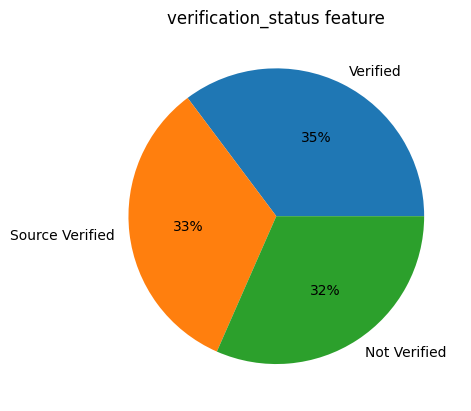

In [ ]:
plt.pie(x = data["verification_status"].value_counts().reset_index()["verification_status"],
        labels = data["verification_status"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("verification_status feature")
plt.show()

* 68% of Applicants have been Verified

### issue_d

* issue_d is month in which the loan was funded
* let convert it into Date time and extract Issue month & Issue Year features

In [4]:
data["issue_d"]=data["issue_d"].astype("datetime64")

In [5]:
data["issue_month"] = data['issue_d'].dt.month
data["issue_year"] = data['issue_d'].dt.year

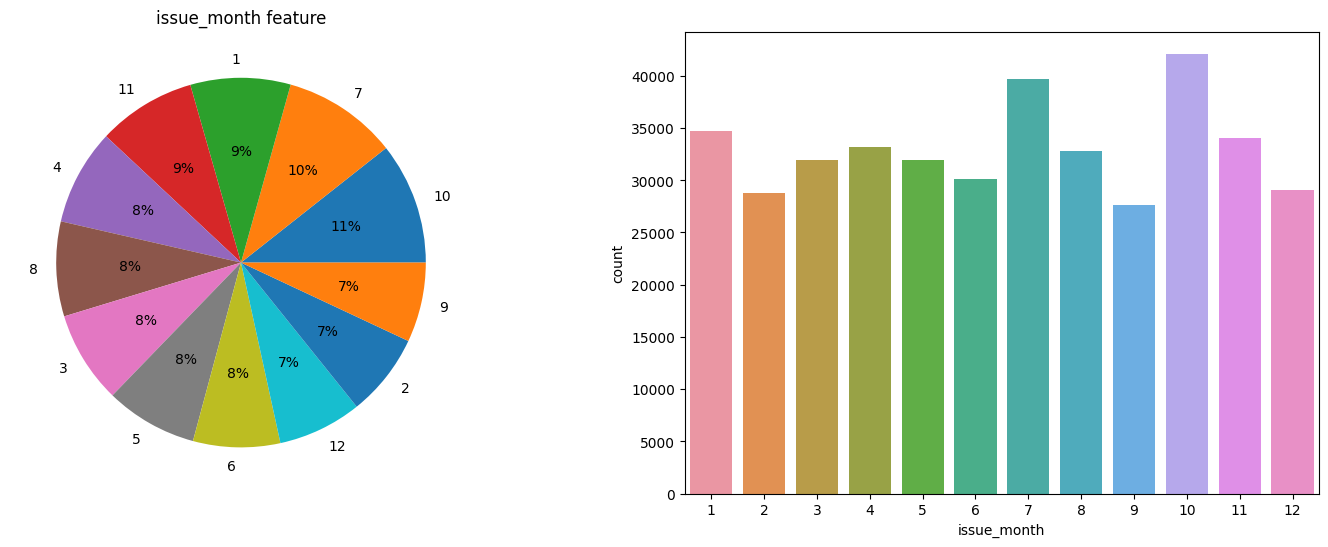

In [ ]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.pie(x = data["issue_month"].value_counts().reset_index()["issue_month"],
        labels = data["issue_month"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("issue_month feature")
plt.subplot(1, 2, 2)
sns.countplot(data=data, x="issue_month", order = sorted(data["issue_month"].unique()))
plt.show()

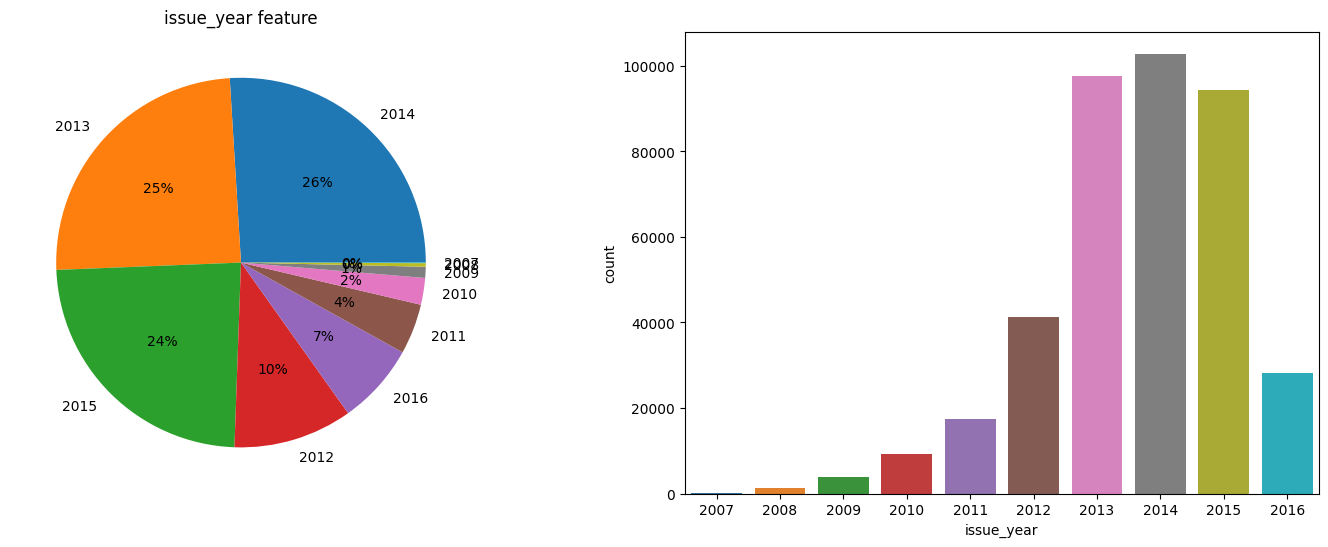

In [ ]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.pie(x = data["issue_year"].value_counts().reset_index()["issue_year"],
        labels = data["issue_year"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("issue_year feature")
plt.subplot(1, 2, 2)
sns.countplot(data=data, x="issue_year", order = sorted(data["issue_year"].unique()))
plt.show()

* Loans are more funded in the month of October and next in July month
* Loans funding has gradually increased from year 2007 & peaked at 2014

### loan_status



Text(0.5, 1.0, 'loan_status feature')

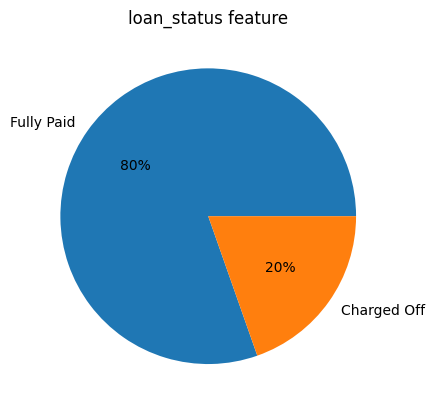

In [ ]:
plt.pie(x = data["loan_status"].value_counts().reset_index()["loan_status"],
        labels = data["loan_status"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("loan_status feature")

* 80% Loan applicant has Fully Paid and 20% applicant have not paid meaning Loantap should not have permitted loan for them
* This is the Target Variable
* we can see our data set is imbalanced as the Ratio is 4:1 for Fully Paid : Charged Off
* Further we have to balaned the data set ot use weight during training

### purpose

In [ ]:
data["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

Text(0.5, 1.0, 'purpose feature')

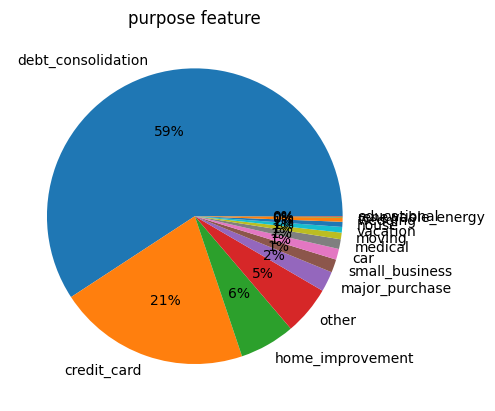

In [ ]:
plt.pie(x = data["purpose"].value_counts().reset_index()["purpose"],
        labels = data["purpose"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("purpose feature")

* Major Purpose of borrower is Debt_consolidation

### title

In [ ]:
data["title"].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [26]:
data["title"].nunique()

48817

* We can see this Feature is Reducntant when compared to earlier purpose features as Purpose feature has refined all the Title given by borrower and categorised properly
* so we can drop this feature

In [ ]:
data.drop(columns = ("title"),inplace = True)

### dti

In [ ]:
data["dti"].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

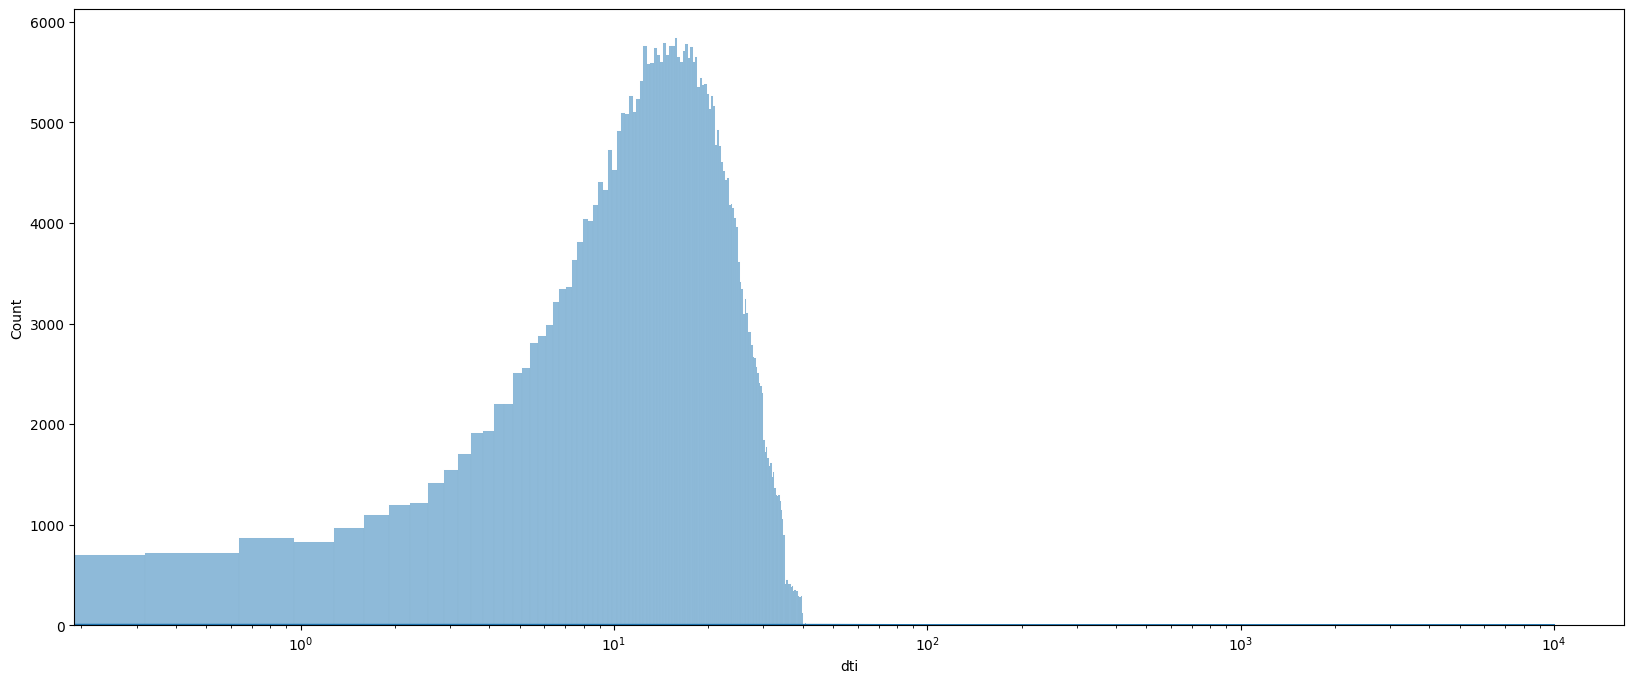

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data=data, x ="dti", kde = True)
plt.xscale('log')
plt.show()

* dti ranges from 0 ~ 9999
* however 75% of borrowers have dti < 23

### earliest_cr_line

In [ ]:
data["earliest_cr_line"].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [6]:
data["earliest_cr_line"] = data["earliest_cr_line"].astype("datetime64")

In [ ]:
data["earliest_cr_line"].describe(datetime_is_numeric=True)

count                           396030
mean     1998-05-03 09:34:15.062495488
min                1944-01-01 00:00:00
25%                1994-10-01 00:00:00
50%                1999-09-01 00:00:00
75%                2003-04-01 00:00:00
max                2013-10-01 00:00:00
Name: earliest_cr_line, dtype: object

* Above feature is giving information abour the Earliest Credit line opened for Borrower
* As such this feature might not be useful
* lets calculate the difference between issue_d and earliest_cr_line

In [7]:
data['Borrowing_hist'] = (data['issue_d'] - data['earliest_cr_line']) / np.timedelta64(1, 'M')

In [8]:
data['Borrowing_hist'].describe()

count    396030.000000
mean        189.055758
std          86.414635
min          35.976098
25%         130.992423
50%         172.028173
75%         232.021191
max         841.972114
Name: Borrowing_hist, dtype: float64

<Axes: xlabel='Borrowing_hist', ylabel='Count'>

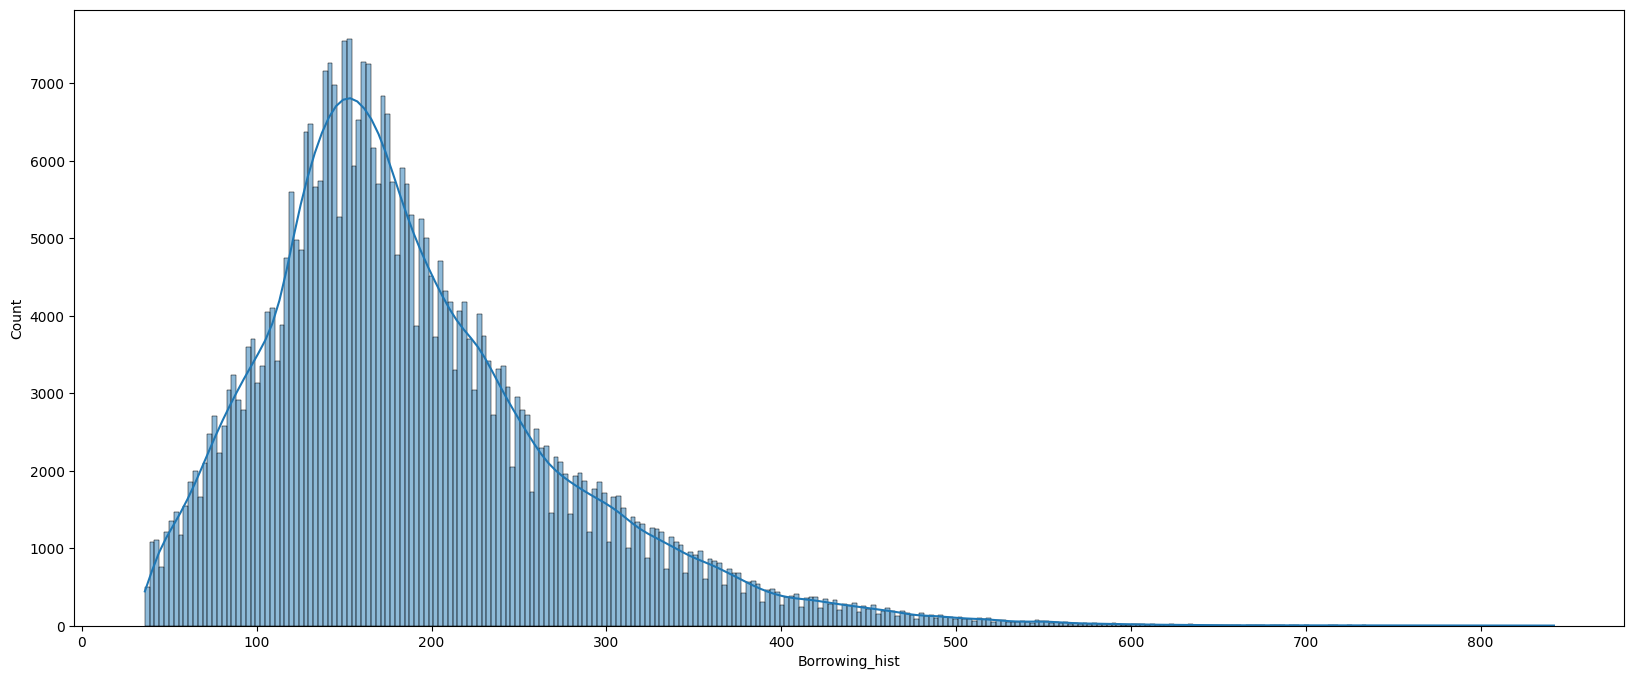

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["Borrowing_hist"],kde = True )

* Borrowing history of Borrower range from 36 ~ 842 Months
* 75% of borrower have history of 232 Month maximum only

### open_acc

In [ ]:
data["open_acc"].describe()

count    396030.000000
mean         11.311153
std           5.137649
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

<Axes: xlabel='open_acc', ylabel='Count'>

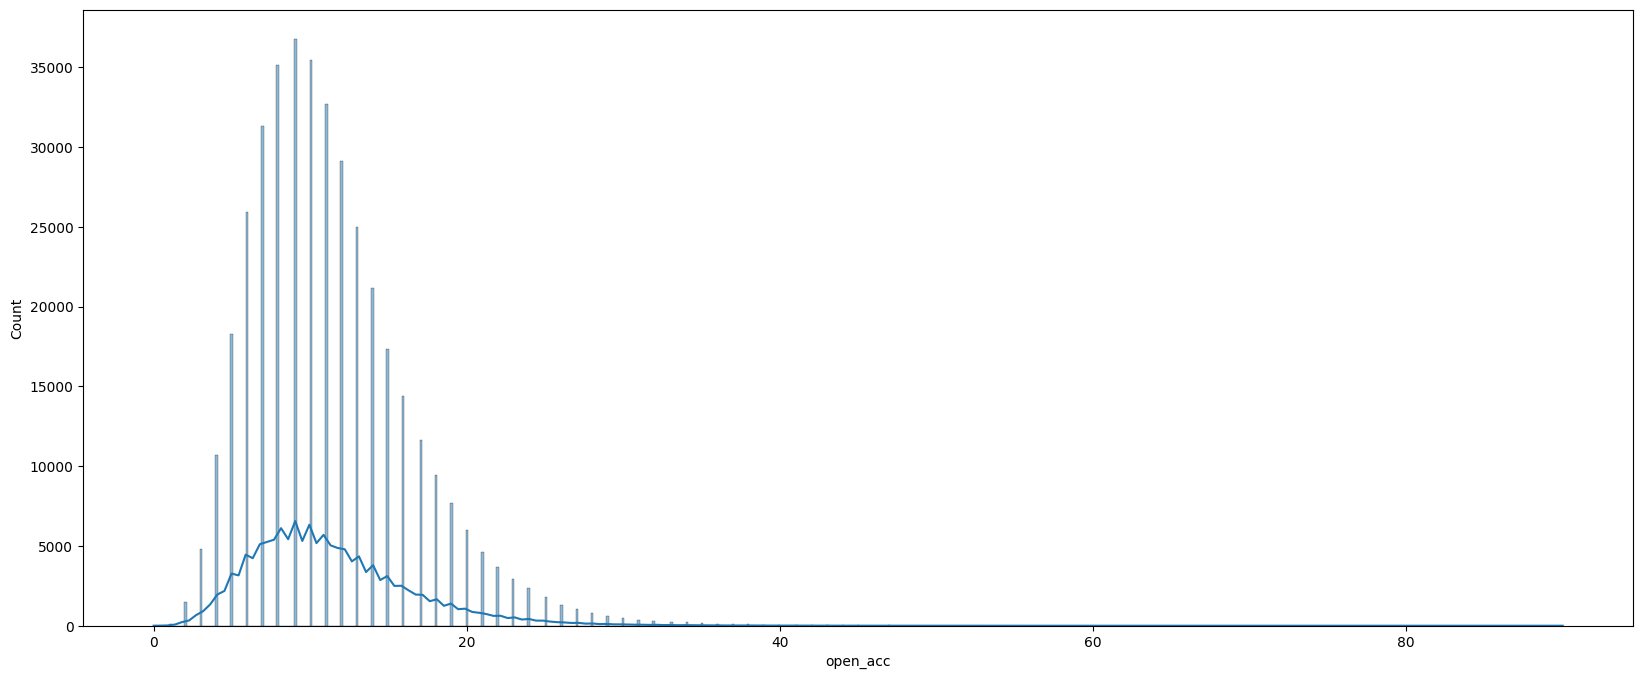

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["open_acc"],kde = True )

* number of open credit lines in the borrower's credit file lies between 0 ~ 90
* However 75% of the Borrowers have Credit lines < 14

### pub_rec

In [ ]:
data["pub_rec"].describe()

count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [ ]:
data["pub_rec"].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

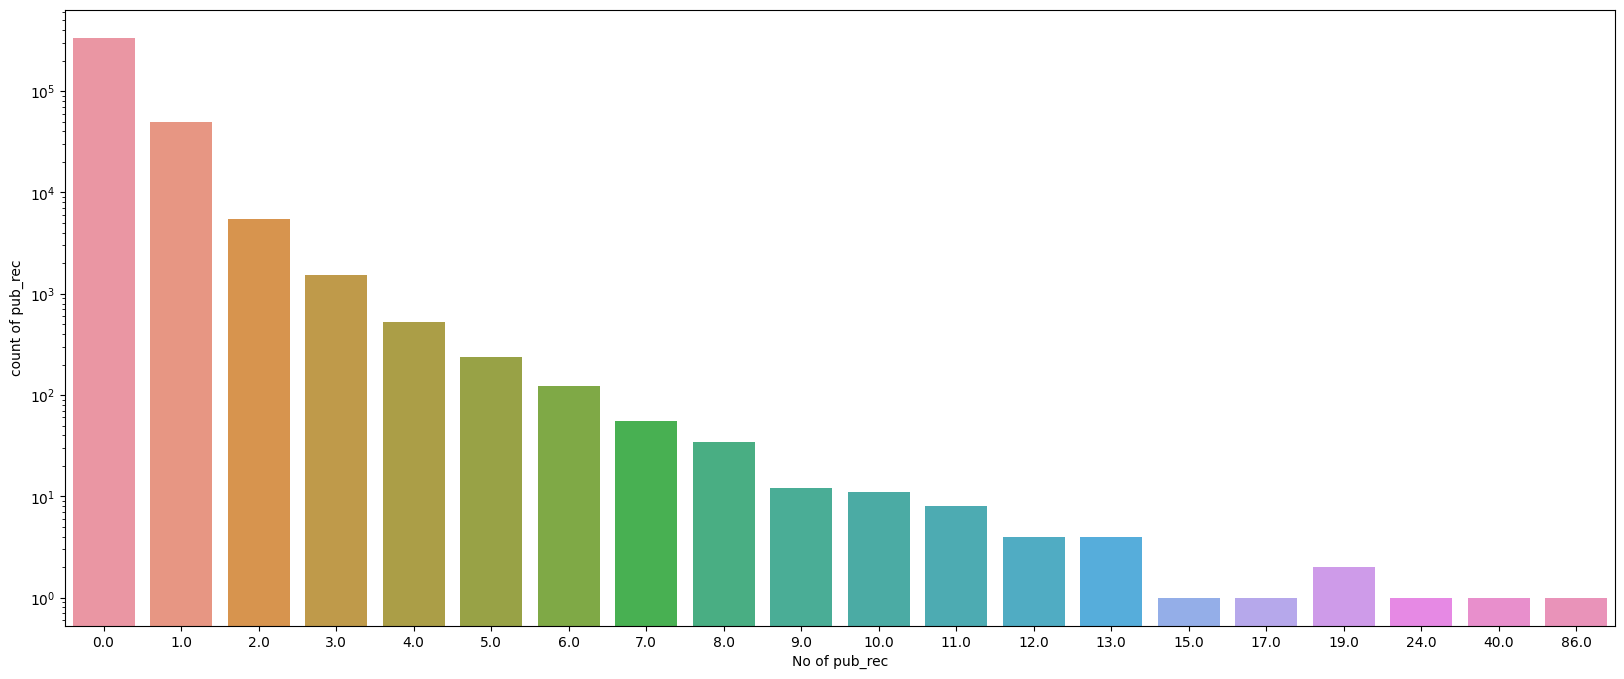

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(y = data["pub_rec"].value_counts().reset_index()["pub_rec"],
        x = data["pub_rec"].value_counts().reset_index()["index"])
plt.xlabel("No of pub_rec")
plt.ylabel("count of pub_rec")
plt.yscale('log')

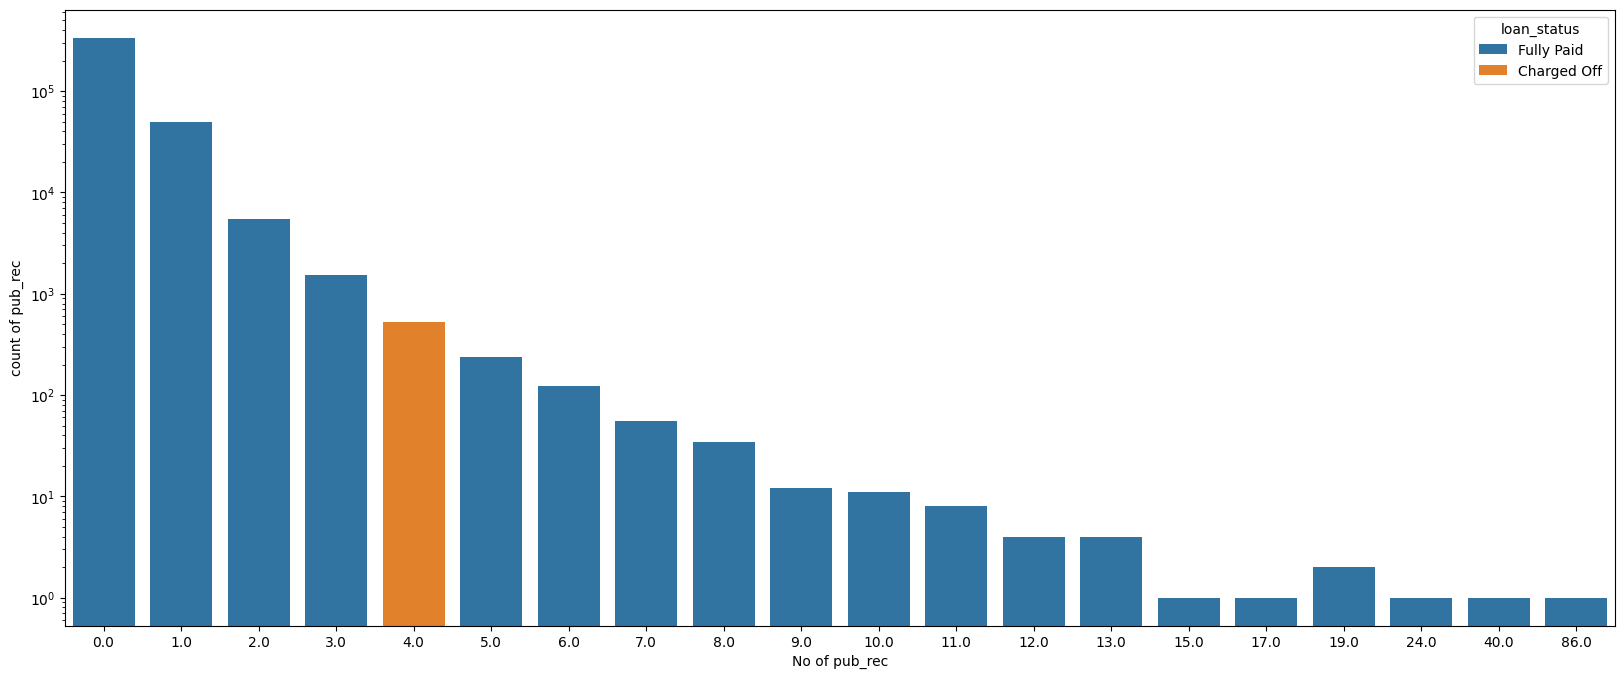

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(y = data["pub_rec"].value_counts().reset_index()["pub_rec"],
        x = data["pub_rec"].value_counts().reset_index()["index"],hue = data["loan_status"],dodge = False )
plt.xlabel("No of pub_rec")
plt.ylabel("count of pub_rec")
plt.yscale('log')

* 85 % of borrowers have Zero derogatory public records
* However Rest 15% Borrowers have derogatory public records ranging from 1 ~ 86

### revol_bal

In [ ]:
data["revol_bal"].describe()

count    3.960300e+05
mean     1.584454e+04
std      2.059184e+04
min      0.000000e+00
25%      6.025000e+03
50%      1.118100e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64

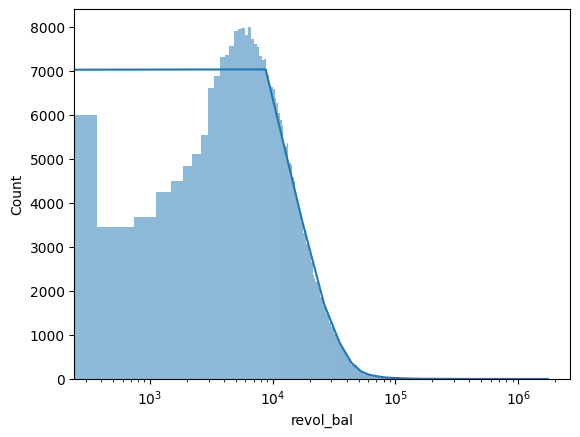

In [ ]:
sns.histplot(data["revol_bal"], kde = True)
plt.xscale("log")

* revol_bal range from 0 ~ 1,743,266
* But 75% of borrowers have revol_bal < 19,620

### revol_util

In [ ]:
data["revol_util"].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

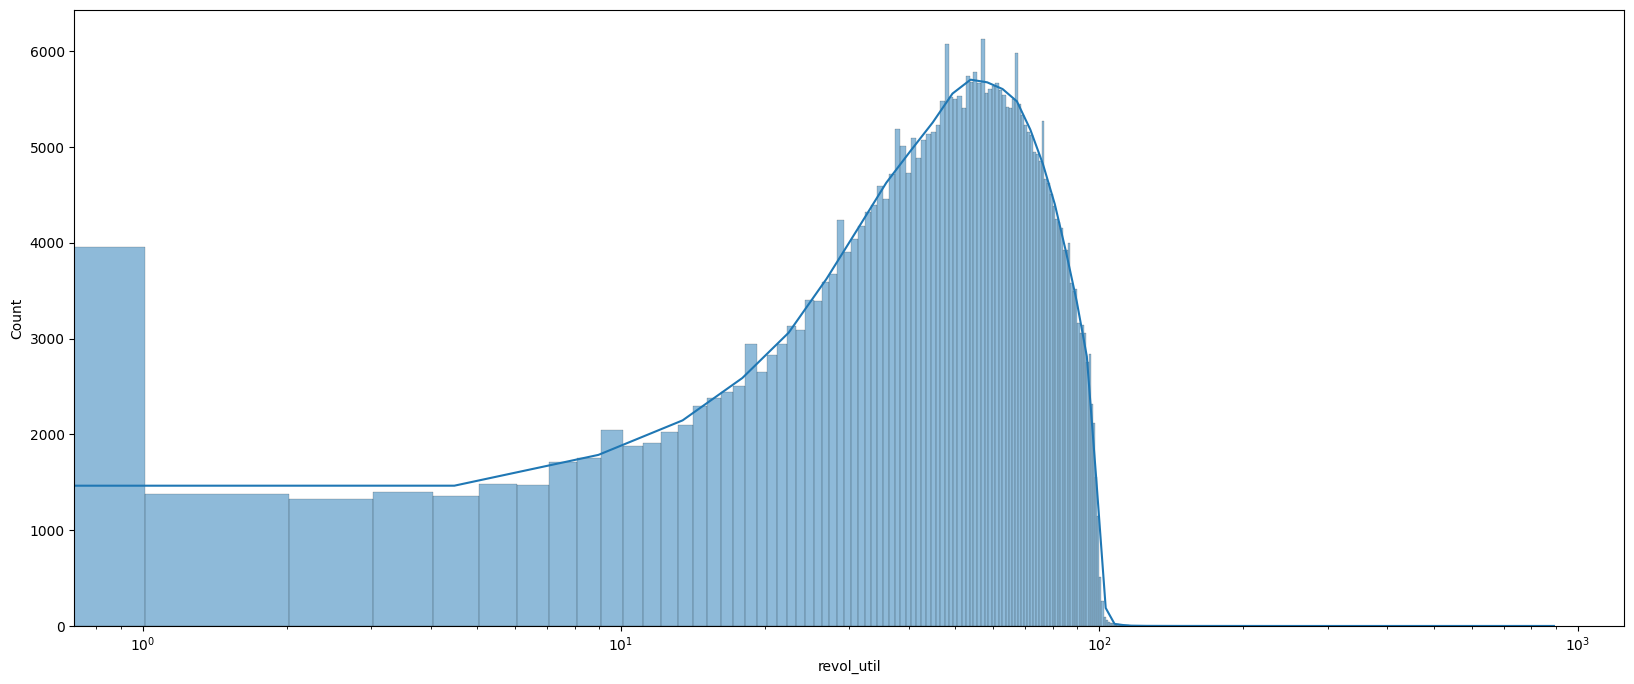

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["revol_util"], kde = True)
plt.xscale("log")

* revol_util range from 0 ~ 892%
* But 75% of borrowers have revol_util < 73%

### total_acc

In [ ]:
data["total_acc"].describe()

count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

<Axes: xlabel='total_acc', ylabel='Count'>

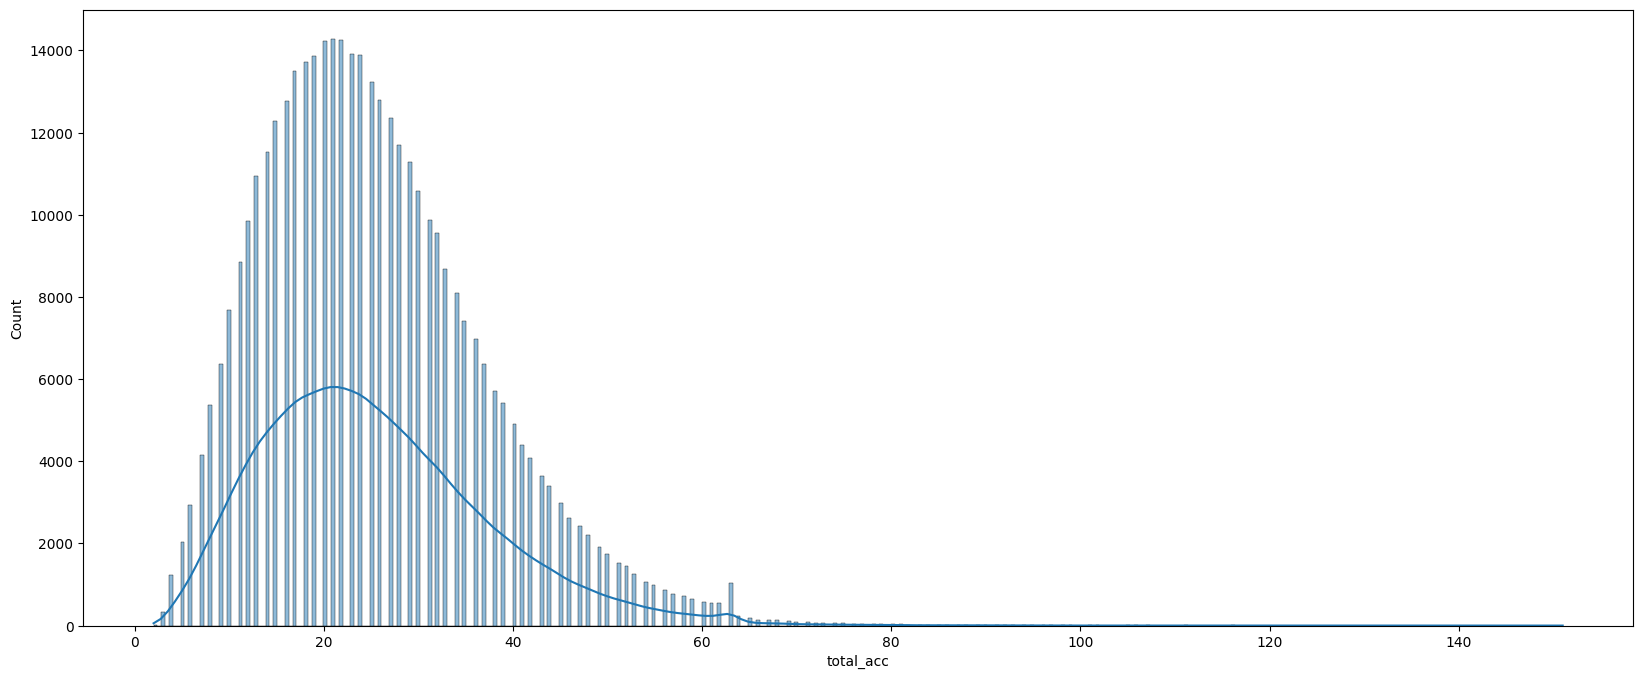

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["total_acc"],kde = True )

* Total number of credit lines in the borrower's credit file lies between 2 ~ 151
* However 75% of the Borrowers have total Credit lines < 32

* As such open_acc and total_acc individually has no interpretation
* Let us find Credit lines utilization factor by Diving Open_acc with Total_acc

In [9]:
data["open_acc_ratio"] = data["open_acc"]/data["total_acc"]

<Axes: xlabel='open_acc_ratio', ylabel='Count'>

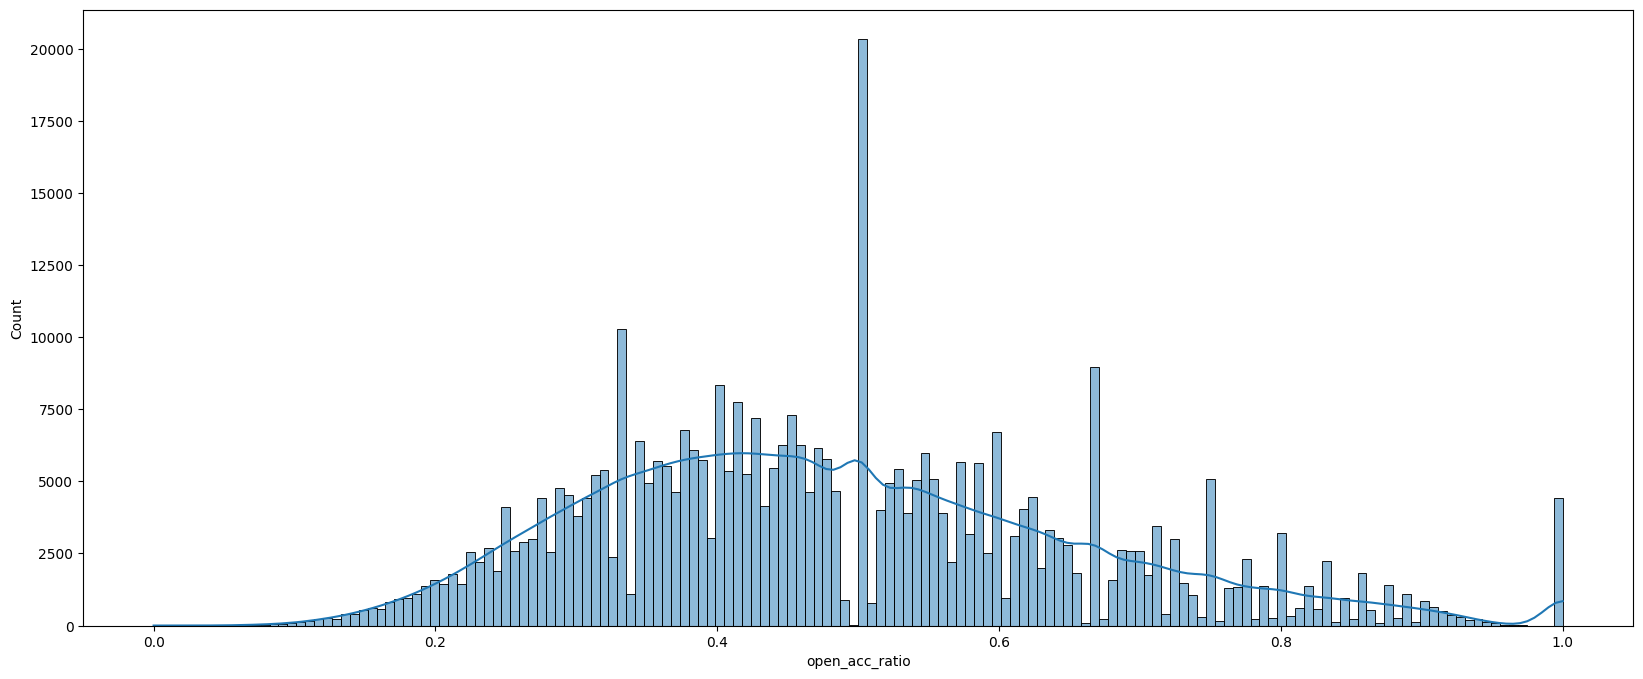

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["open_acc_ratio"],kde = True )

In [12]:
data["open_acc_ratio"].describe()

count    396030.000000
mean          0.483716
std           0.173912
min           0.000000
25%           0.357143
50%           0.461538
75%           0.590909
max           1.000000
Name: open_acc_ratio, dtype: float64

* As we can see Open Credit line ratio lies between 0~1 only
* 75% of borrowers have  Open Credit line ratio < 0.59


### initial_list_status


In [ ]:
data["initial_list_status"].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

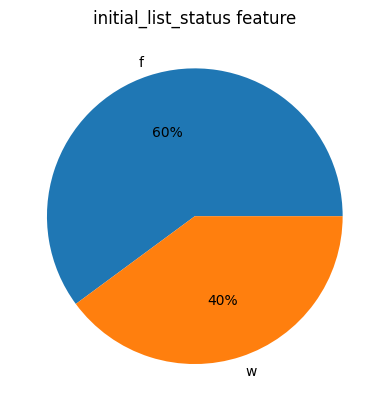

In [ ]:
plt.pie(x = data["initial_list_status"].value_counts().reset_index()["initial_list_status"],
        labels = data["initial_list_status"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("initial_list_status feature")
plt.show()

* 60% Borrowers have initial_list_status as f & rest 40% have w

### application_type

In [ ]:
data["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

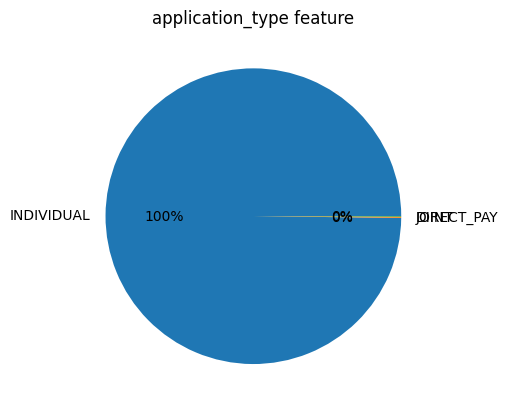

In [ ]:
plt.pie(x = data["application_type"].value_counts().reset_index()["application_type"],
        labels = data["application_type"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("application_type feature")
plt.show()

* Most of the Applicants area Individuals

### mort_acc

In [ ]:
data["mort_acc"].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

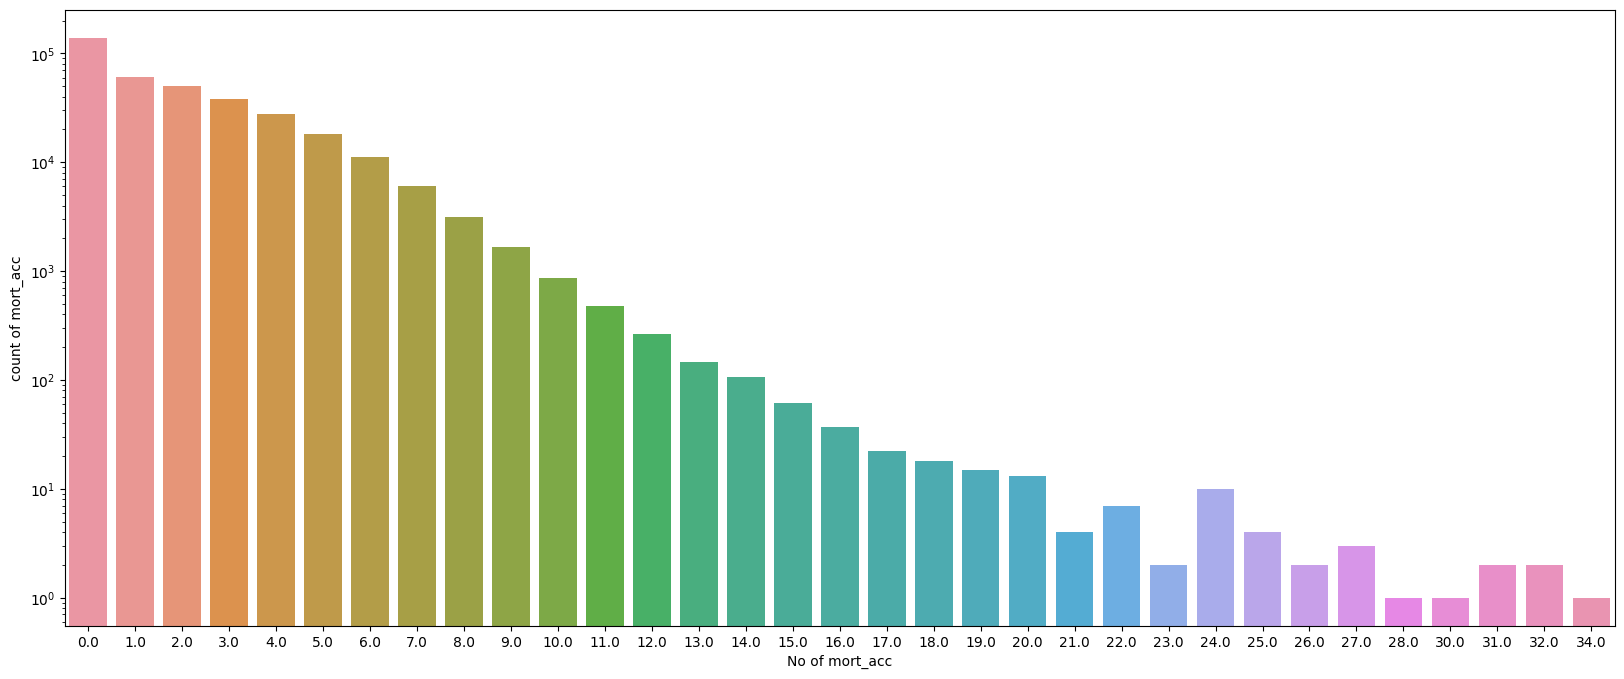

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(y = data["mort_acc"].value_counts().reset_index()["mort_acc"],
        x = data["mort_acc"].value_counts().reset_index()["index"])
plt.xlabel("No of mort_acc")
plt.ylabel("count of mort_acc")
plt.yscale('log')

* mort_acc range from 0 ~ 34
* 75% of loan applicants have mortage accounts < =3

### pub_rec_bankruptcies

In [ ]:
data["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

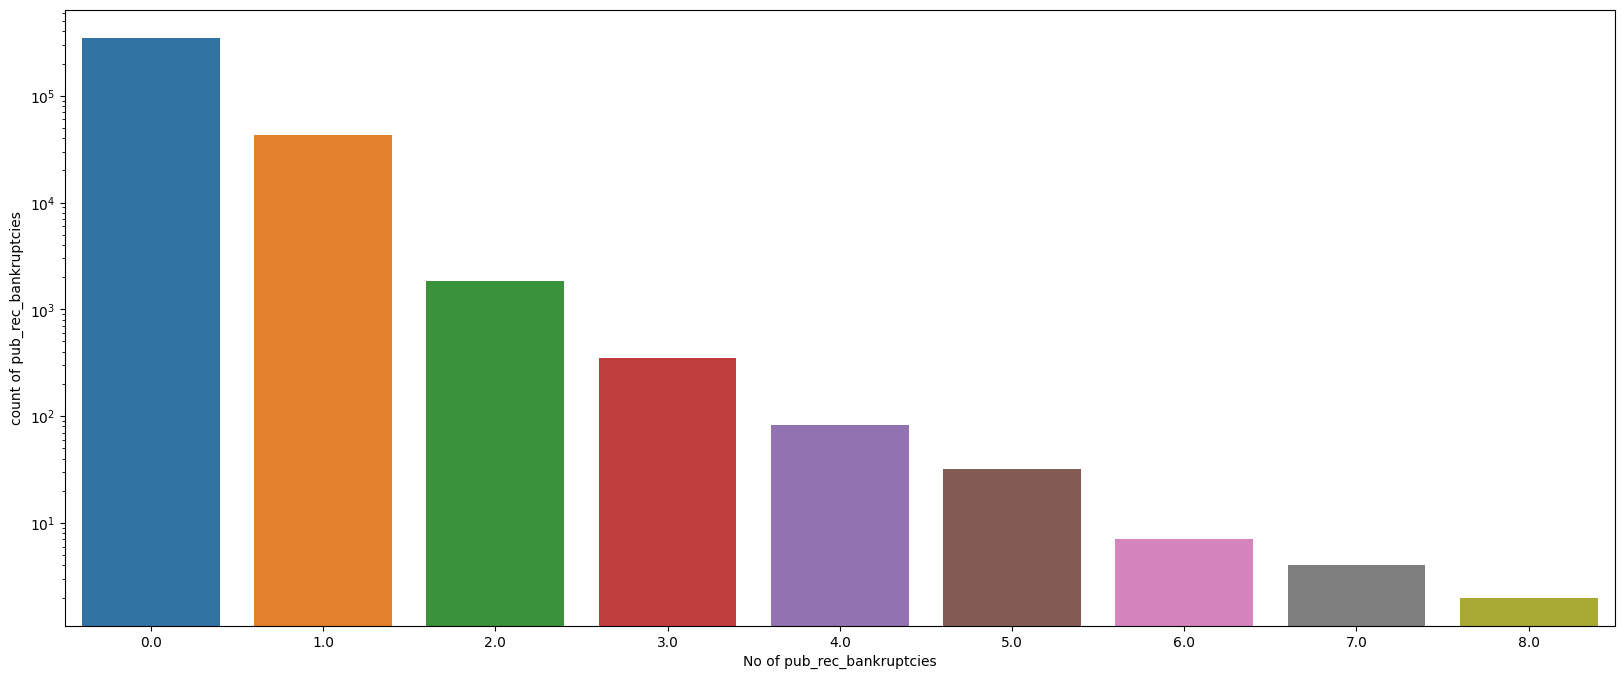

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(y = data["pub_rec_bankruptcies"].value_counts().reset_index()["pub_rec_bankruptcies"],
        x = data["pub_rec_bankruptcies"].value_counts().reset_index()["index"])
plt.xlabel("No of pub_rec_bankruptcies")
plt.ylabel("count of pub_rec_bankruptcies")
plt.yscale('log')

In [ ]:
data["pub_rec_bankruptcies"].describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

* 88% Applicants have "0" pub_rec_bankruptcies

### Address

In [ ]:
data["address"].value_counts()

USCGC Smith\r\nFPO AE 70466                           8
USS Johnson\r\nFPO AE 48052                           8
USNS Johnson\r\nFPO AE 05113                          8
USS Smith\r\nFPO AP 70466                             8
USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
455 Tricia Cove\r\nAustinbury, FL 00813               1
7776 Flores Fall\r\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
787 Michelle Causeway\r\nBriannaton, AR 48052         1
Name: address, Length: 393700, dtype: int64

In [16]:
data["address"].nunique()

393700

* Let us split the Address into Place, State & Code
* We will the remove Initial Detailed address of each individual as it is very detailed and unique for Each borrower
* we will use Place, State & Code for our Logistic Model

In [14]:
data["address"]=data["address"].apply(lambda x : x.split("\r\n")[-1] )

In [17]:
data["address"].head()

0     Mendozaberg, OK 22690
1      Loganmouth, SD 05113
2     New Sabrina, WV 05113
3    Delacruzside, MA 00813
4      Greggshire, VA 11650
Name: address1, dtype: object

In [18]:
data["address_place"]=data["address"].apply(lambda x : x.split(",")[0] )
data["address_state"]=data["address"].apply(lambda x : x.split()[1] )
data["address_code"]=data["address"].apply(lambda x : x.split()[2] )

In [21]:
data["address_place"].nunique()

67600

In [22]:
data["address_state"].nunique()

11409

In [23]:
data["address_code"].nunique()

61

In [15]:
data["address1"].nunique()

342494

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

## Bivariate Analysis

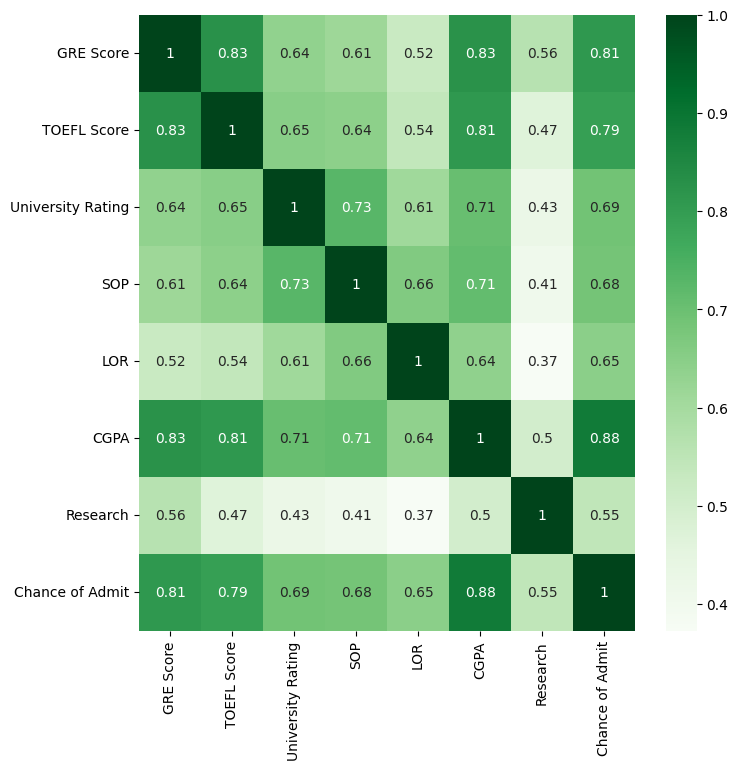

In [ ]:
plt.figure(figsize =(8,8))
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

* All features have Positive correlation with "Chance of Admit"
* CGPA[0.88],GRE Score[0.81],TOEFL Score[0.79] has very high correlation with "Chance of Admit"
* Further SOP[0.68], LOR[0.65] has almost same Correlation with ""Chance of Admit"
* Comparatively Low Correlation is found w.r.t Reasearch & "Chance of Admit"[0.55], However is positively impactful

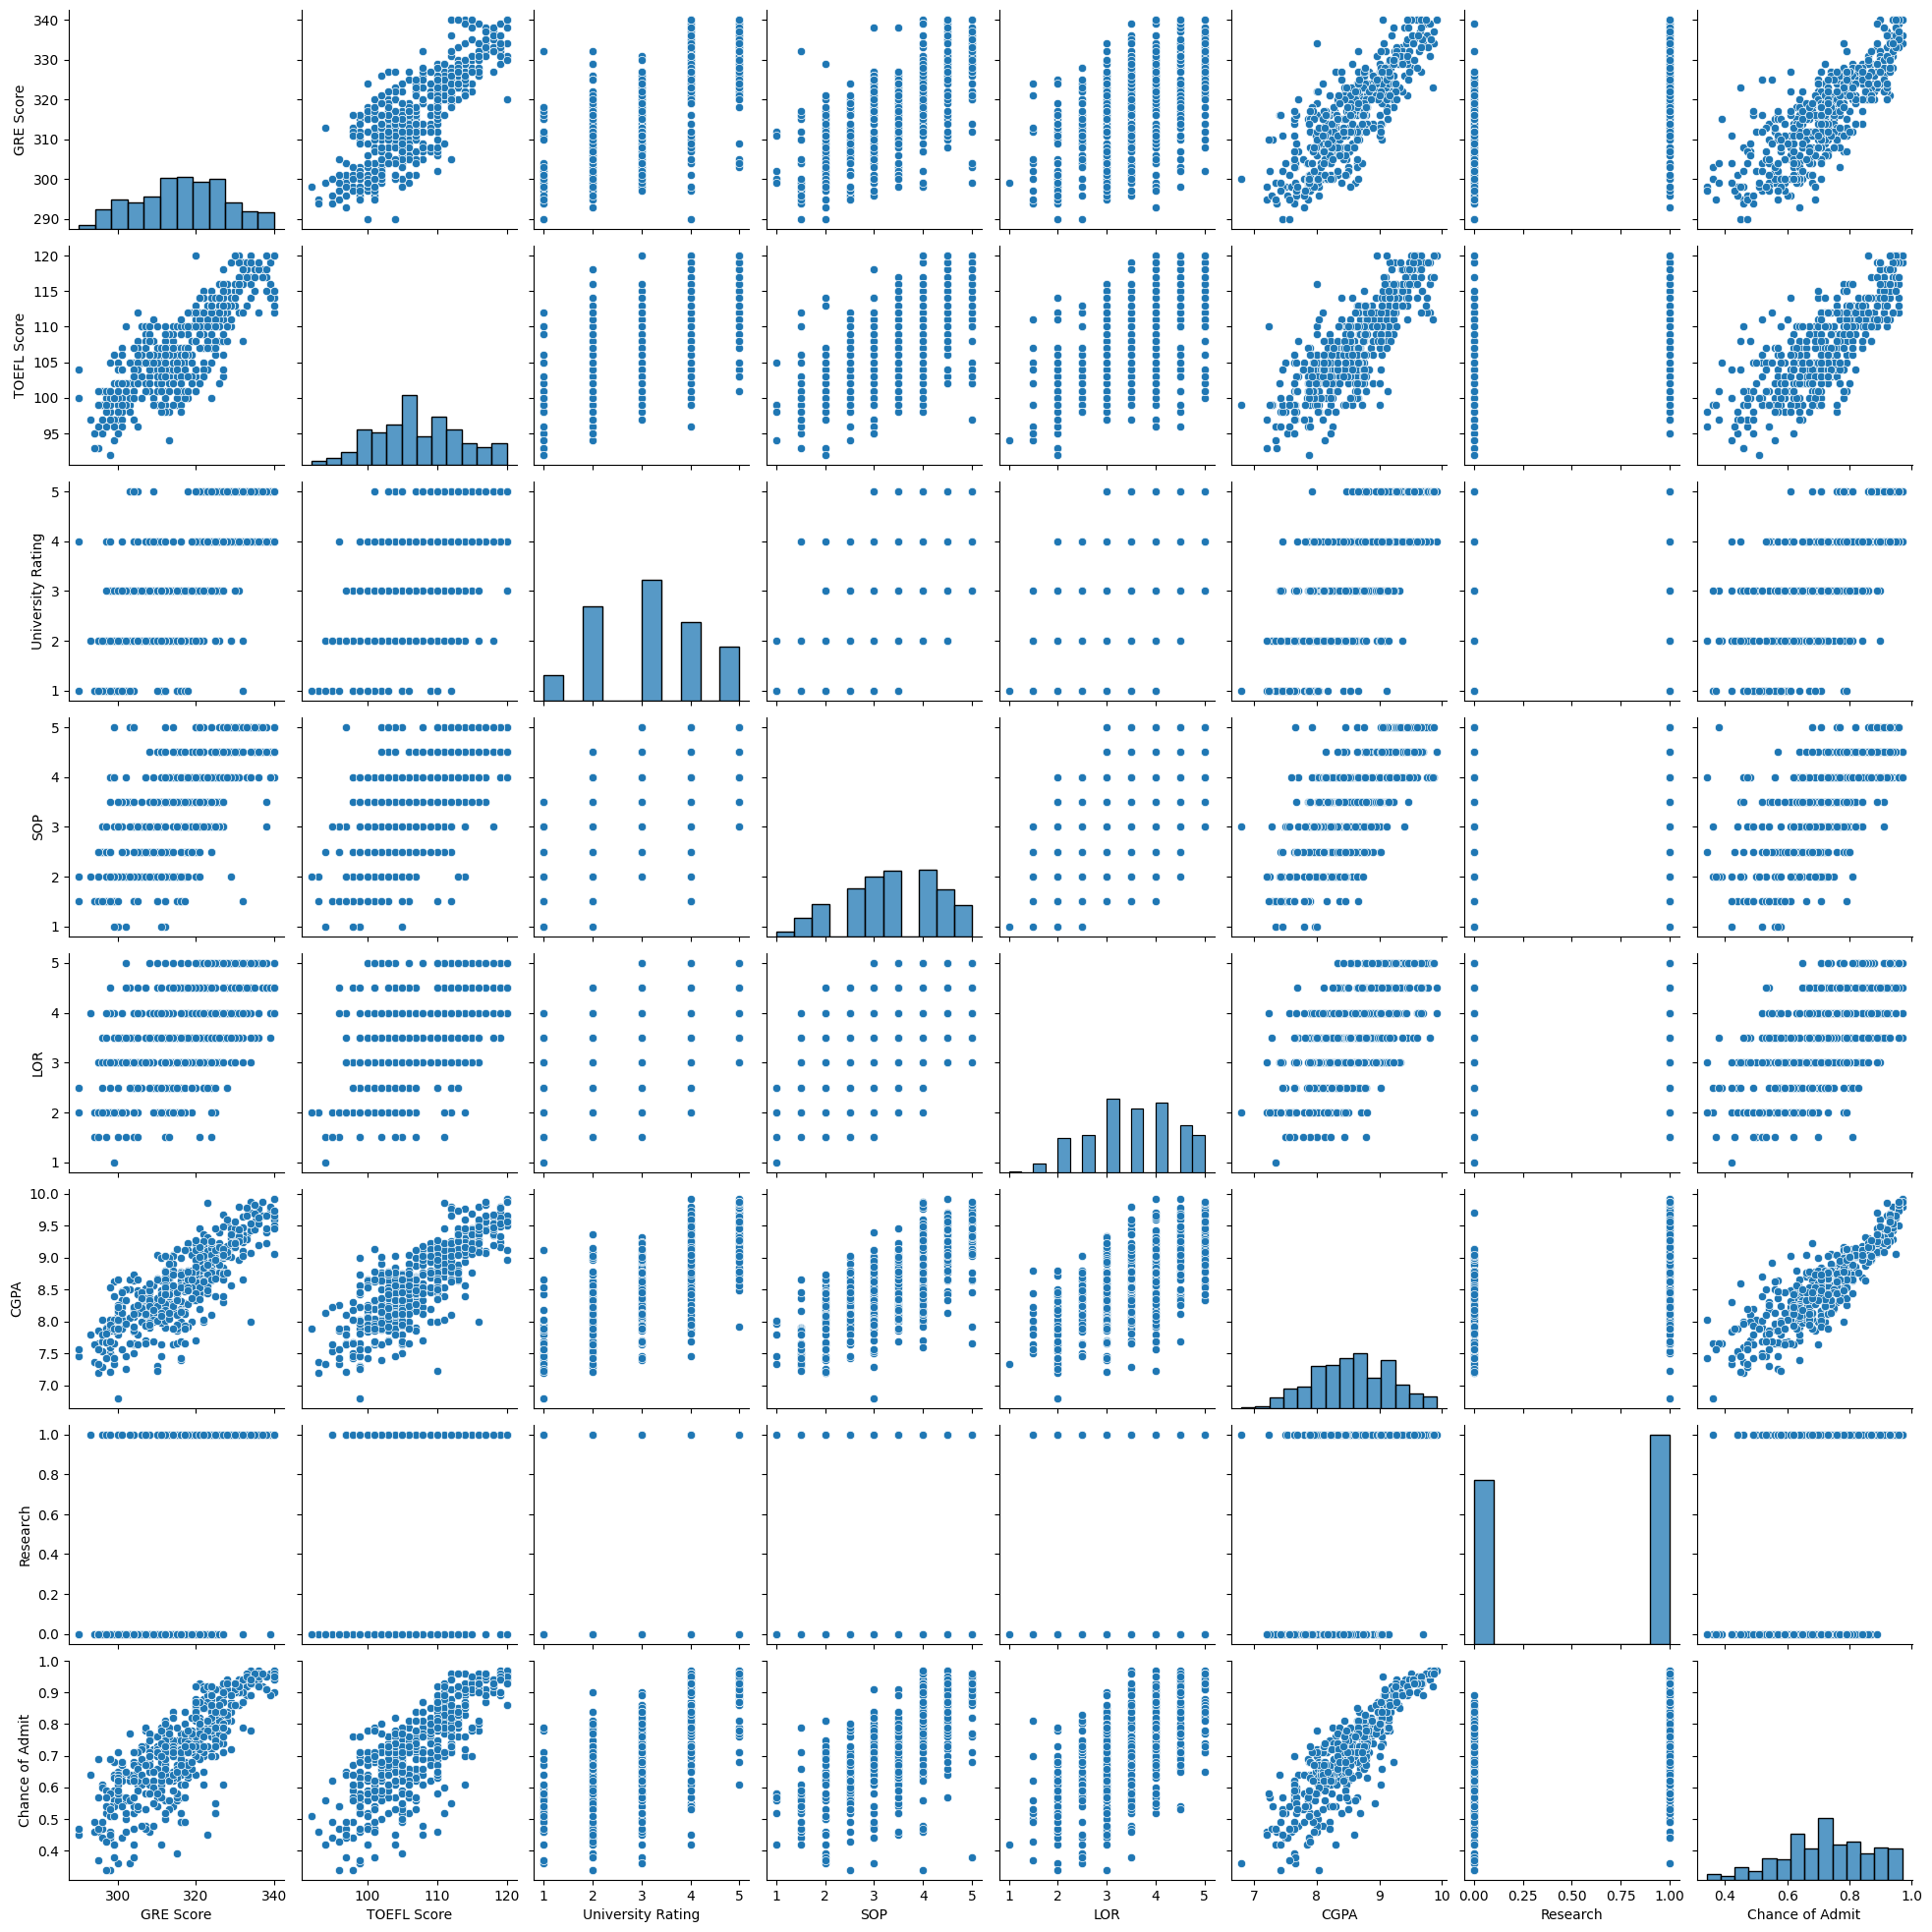

In [ ]:
sns.pairplot(data=data)

* All Feautures are Positive Correlated and almost Monotonically increasing with "Change of Admit"

# **Data Overview & Cleaning**

## Dropping Irrelevant columns

In [25]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'issue_month',
       'issue_year', 'Borrowing_hist', 'open_acc_ratio', 'address1',
       'address_place', 'address_state', 'address_code'],
      dtype='object')

In [27]:
data.drop(["issue_d","earliest_cr_line","open_acc","total_acc","address","emp_title","title"], axis = 1,inplace= True)

In [28]:
data.shape

(396030, 28)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

## Duplicate Values & Their Treatment

In [30]:
data.loc[data.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,Borrowing_hist,open_acc_ratio,address1,address_place,address_state,address_code


No duplicate rows found

## Missingvalues & Their Treatment

In [ ]:
data.isna().sum(axis = 0)

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
title                       0
dti                         0
pub_rec                     0
revol_bal                   0
revol_util                276
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
issue_month                 0
issue_year                  0
Borrowing_hist              0
open_acc_ratio              0
dtype: int64

### emp_length

In [31]:
data["emp_length"].isnull().sum(axis = 0)

18301

* We will fill the Null values with Unkown Length
* Later on , we will use Target Encoders with "loan_status" target as to convert all Categories of emp_length into numericals

In [32]:
data["emp_length"].fillna("Unknown", inplace = True)

In [33]:
data["emp_length"].isnull().sum(axis = 0)

0

* No Missing values present in emp_length

### revol_util,mort_acc,pub_rec_bankruptcies

* As all above three are Numericals, we will will use Median Values to Fill the Null values

In [34]:
data["revol_util"].fillna(data["revol_util"].median(), inplace = True)
data["mort_acc"].fillna(data["mort_acc"].median(), inplace = True)
data["pub_rec_bankruptcies"].fillna(data["pub_rec_bankruptcies"].median(), inplace = True)

In [41]:
data.isna().sum(axis = 0).sum()

0

* All Null Values have been Filled

## Flag Creation

* pub_rec
* mort_acc
* pub_rec_bankruptcies

In [36]:
data["pub_rec"]= data["pub_rec"].apply(lambda x : 1 if x>1 else 0)
data["mort_acc"]= data["mort_acc"].apply(lambda x : 1 if x>1 else 0)
data["pub_rec_bankruptcies"]= data["pub_rec_bankruptcies"].apply(lambda x : 1 if x>1 else 0)

In [37]:
data["pub_rec_bankruptcies"].value_counts()

0    393705
1      2325
Name: pub_rec_bankruptcies, dtype: int64

In [38]:
data["pub_rec"].value_counts()

0    388011
1      8019
Name: pub_rec, dtype: int64

In [39]:
data["mort_acc"].value_counts()

0    237988
1    158042
Name: mort_acc, dtype: int64

## Datatype Conversion of Features

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  pub_rec               396030 non-null  int64  
 14  revol_bal             396030 non-null  float64
 15  

* There are many Object Data Type, we will convert them into Category Data Type

In [46]:
catlist = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status',
           'purpose','initial_list_status', 'application_type', 'issue_month', 'issue_year',
           'mort_acc','pub_rec_bankruptcies', 'pub_rec',"address_place","address_state","address_code"]

In [47]:
numlist = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal',
       'revol_util','Borrowing_hist', 'open_acc_ratio']

In [48]:
for i in catlist:
  data[i].astype("category")

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  pub_rec               396030 non-null  int64  
 14  revol_bal             396030 non-null  float64
 15  

# **Finding & Treating Outliers Using IQR**

## IQR Analysis and Outlier Finding

* We will create a new Dataframe " outlier" which store Boolean value of IQR Analysis Result for each reading of all numerical feature columns

In [67]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in numlist:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data[z],75) - np.percentile(data[z],25)
    lower_limit = max (np.percentile(data[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data[z],75) + 1.5*IQR
    outlier[z] = (data[z]>upper_limit) | (data[z]<lower_limit)

    print("Minimum -->",data[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data[z],25))
    print("Median -->",np.percentile(data[z],50))
    print("Quantile75 -->",np.percentile(data[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data[z].max())

    print()
    print("Out of ",len(data[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print("Percentage of Outliers:",np.round((outlier[z].sum()/len(data[z])*100),2),"%")
    print()
    print("*******************************************************************")

loan_amnt Feature
*******************************************************************
Minimum --> 500.0
Lower Limit --> 0
Quantile25 --> 8000.0
Median --> 12000.0
Quantile75 --> 20000.0
Upper Limit --> 38000.0
Maximum --> 40000.0

Out of  396030 Data points , There are 191 Outliers
Percentage of Outliers: 0.05 %

*******************************************************************
int_rate Feature
*******************************************************************
Minimum --> 5.32
Lower Limit --> 1.4900000000000038
Quantile25 --> 10.49
Median --> 13.33
Quantile75 --> 16.49
Upper Limit --> 25.489999999999995
Maximum --> 30.99

Out of  396030 Data points , There are 3777 Outliers
Percentage of Outliers: 0.95 %

*******************************************************************
installment Feature
*******************************************************************
Minimum --> 16.08
Lower Limit --> 0
Quantile25 --> 250.33
Median --> 375.43
Quantile75 --> 567.3
Upper Limit --> 1042.75499999

## Box-Plot for Outlier Visualization

* Let us visualize the outliers with Box plot

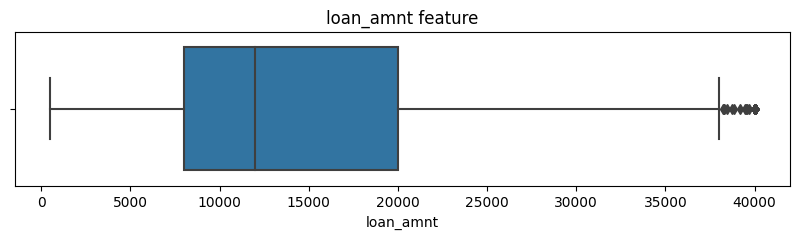

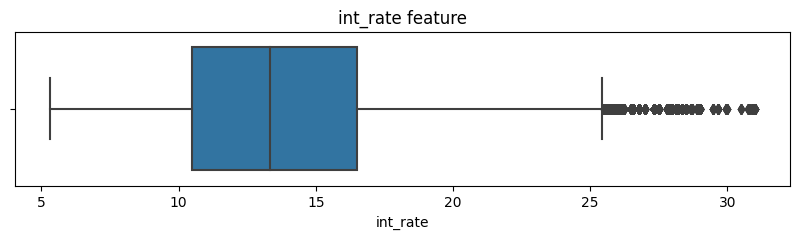

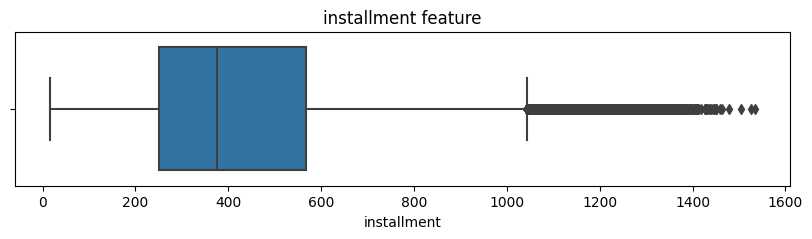

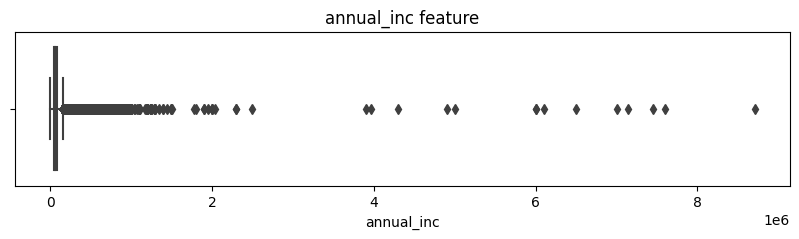

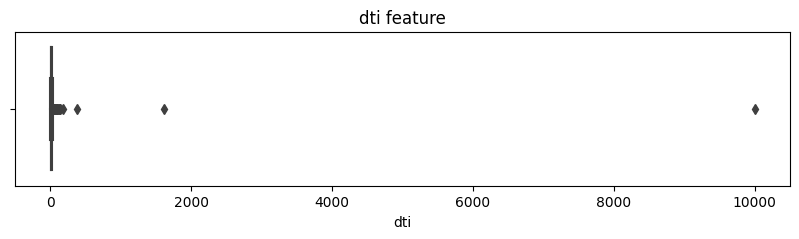

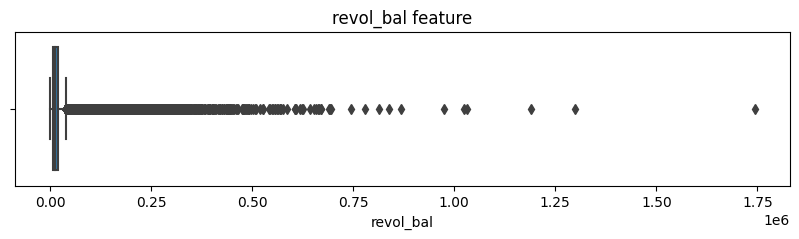

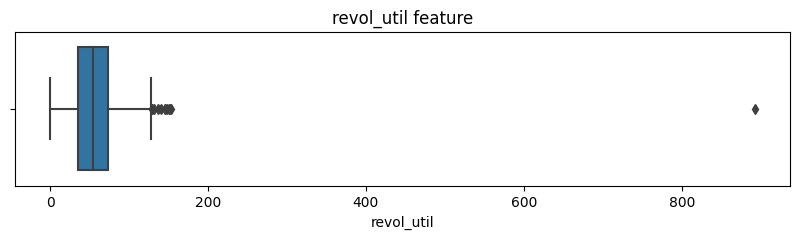

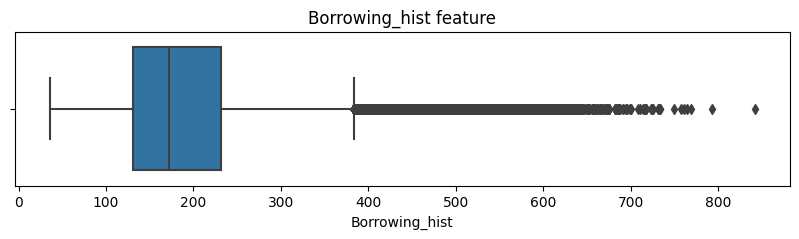

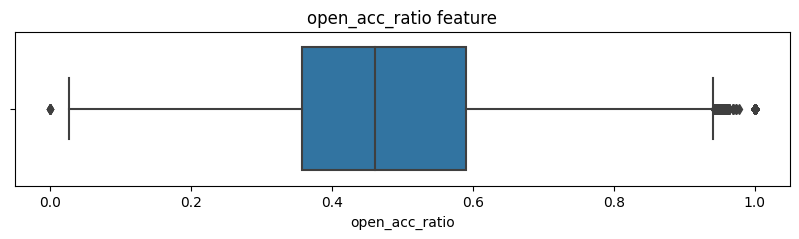

In [51]:
for z in numlist:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* From above graph we can see all the Numerical Features have outliers
* But Some of the Outliers have Relevance , so we will not treat all the outlier
* These Feature [ 'loan_amnt', 'int_rate', 'installment', 'open_acc_ratio'] -->  we will keep as they are and not treat them
* We will treat these features ['annual_inc', 'dti', 'revol_bal' 'revol_util','Borrowing_hist'] and cap the outlier to Lower and Upper Limit Values

In [ ]:
for z in ['annual_inc', 'dti', 'revol_bal','revol_util','Borrowing_hist']:
  UL = np.percentile(data[z],75)+ 1.5*(np.percentile(data[z],75) - np.percentile(data[z],25))
  data[outlier[z],z] = UL

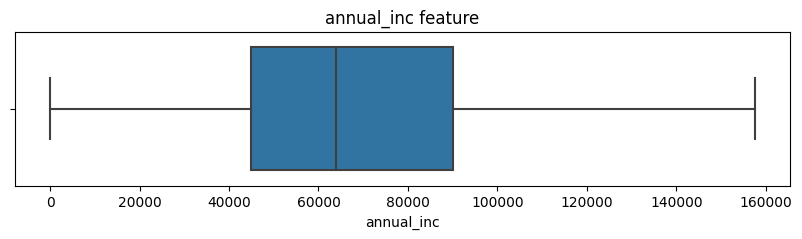

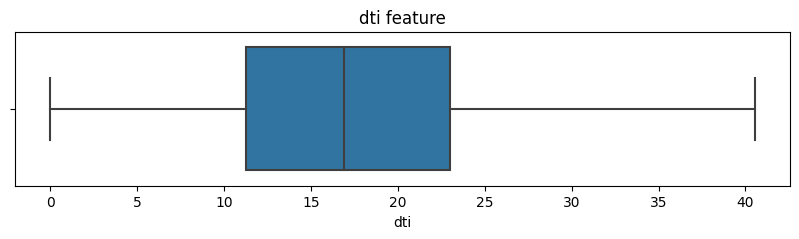

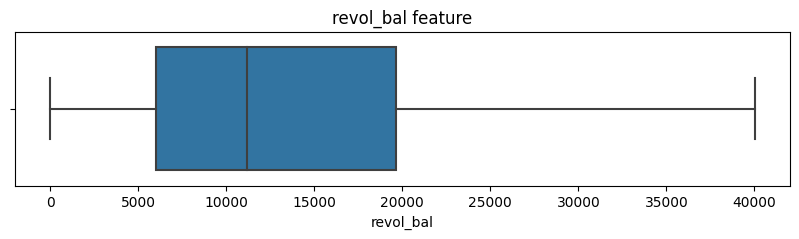

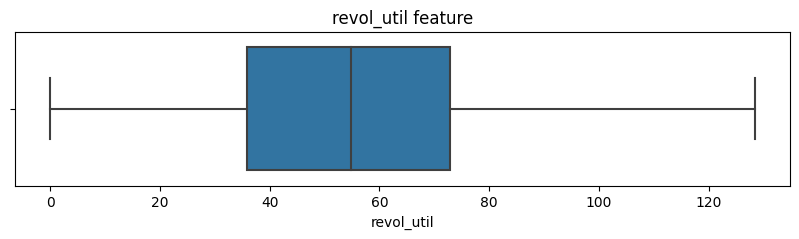

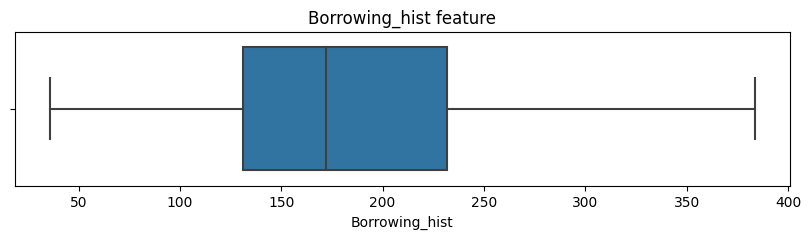

In [71]:
for z in ['annual_inc', 'dti', 'revol_bal','revol_util','Borrowing_hist']:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data, x = z)
  plt.title(z+" feature")

All the Required Outliers have been Capped with Upper Limit Values for Respective Features

# **Hypothesis Testing**

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

* In this Data Differet test [Num-Num,Cat-Num] can be done
* But our objective to correctly predict "Chance of Admit"
* so we will do Hypothesis testing for below combinations for check if infact feature has effect on "Chance of Admit"
** GRE Score and Chance of Admit
** TOEFL Score and Change of Admit
** CGPA & Chance of Admit
** LOP & Chance of Admit
** SOP & Chance of Admit
** University Rating & Chance of Admit
** Research & Chance of Admit





## Test Set up

In this section let us fix the Confidence level & Level of Signification for our Hypothesis testing.

As this is with respect to predicting Chance_of_Admit
* let us Assume **we want 95% Confidence to reject Null Hypothesis**
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

* As our purpose of Hypothesis testing to just verify the relation of Feature not to give final judgement...We will use Non Parametric test to avoid assumptions checking
* However final judgment of impact of each feature will be given after training Linear Regression model

* As we have seen earlier in pairplot all the features are monotonically increasing w.r.t "Chance of Admit"
* for Num-Num, we will use **spearmanr test**
** H0: No correlation
** Ha: There is correlation

## Testing

In [ ]:
for i in data.columns[:-2]:
  spearman_coeff, p_value = spearmanr(data[i], data["Chance of Admit"])
  print("*******************************")
  print(p_value)
  if p_value < 0.05:
    print("Reject H0")
    print(i,"is correlated to Chance_of_admit")
  else:
    print("Fail to reject H0")
    print(i,"is not correlated to Chance_of_admit")

*******************************
5.734552105475668e-124
Reject H0
GRE Score is correlated to Chance_of_admit
*******************************
1.504956427966445e-109
Reject H0
TOEFL Score is correlated to Chance_of_admit
*******************************
5.889500555297506e-76
Reject H0
University Rating is correlated to Chance_of_admit
*******************************
1.1336315351749534e-75
Reject H0
SOP is correlated to Chance_of_admit
*******************************
8.172072041088856e-60
Reject H0
LOR is correlated to Chance_of_admit
*******************************
7.372294266325021e-171
Reject H0
CGPA is correlated to Chance_of_admit


* From Hypothesis testing, we can say all feature are correlated to "Chance of Admit"

# **Feature Engineering**

### Eliminate Reduntant features

* No Reduntant Feature available,
* From Hypothesis Testing we can say all feature are useful Predictor of "Chance of Admit"

## Encoding : Non-Numerical to Numerical

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* All data points are numerical only
* So need for conversion to Numerical

## Scaling of Numerical Categories

* Before scaling let us note down Maximum and Minimum values possible for given feature( not maximum and Minimum of Features in data given)
* Further we will use the these Maximum & Minimum values for Scaling

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

* Let us do KS test for Goodness of Fit to check for  Normal Distribution in order to decide the type of scaler ot be used [ Minmax or Standard Scaler]

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in data.columns:
  test_stat, p_value = kstest(data[i],stats.norm.cdf)
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(i,"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(i,"Data is Gaussian")
  print()

0.0
Reject H0
GRE Score Data is Not Gaussian

0.0
Reject H0
TOEFL Score Data is Not Gaussian

0.0
Reject H0
University Rating Data is Not Gaussian

0.0
Reject H0
SOP Data is Not Gaussian

0.0
Reject H0
LOR Data is Not Gaussian

0.0
Reject H0
CGPA Data is Not Gaussian

4.1132799581816557e-116
Reject H0
Research Data is Not Gaussian

1.5256082690083004e-204
Reject H0
Chance of Admit Data is Not Gaussian



* we have observed that All the Numericals are not following Normal Distribution, so we cannot do Stadardization
* Now we will do Normalization using Minmax Scaler



In [ ]:
Normscaler = MinMaxScaler()

In [ ]:
scaleddata = Normscaler.fit_transform(data)

In [ ]:
scaleddata

array([[0.94      , 0.92857143, 0.75      , ..., 0.91346154, 1.        ,
        0.92063492],
       [0.68      , 0.53571429, 0.75      , ..., 0.66346154, 1.        ,
        0.66666667],
       [0.52      , 0.42857143, 0.5       , ..., 0.38461538, 1.        ,
        0.6031746 ],
       ...,
       [0.8       , 1.        , 1.        , ..., 0.88461538, 1.        ,
        0.93650794],
       [0.44      , 0.39285714, 0.75      , ..., 0.5224359 , 0.        ,
        0.61904762],
       [0.74      , 0.75      , 0.75      , ..., 0.71794872, 0.        ,
        0.79365079]])

In [ ]:
scaleddata = pd.DataFrame(scaleddata,columns = data.columns)

In [ ]:
scaleddata

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.714286,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000000,0.522436,0.0,0.619048


In [ ]:
scaleddata.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.529440,0.542571,0.528500,0.593500,0.567143,0.569372,0.560000,0.605937
std,0.225903,0.217210,0.285878,0.247751,0.263722,0.193850,0.496884,0.224032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.250000,0.375000,0.428571,0.425481,0.000000,0.460317
50%,0.540000,0.535714,0.500000,0.625000,0.571429,0.564103,1.000000,0.603175
75%,0.700000,0.714286,0.750000,0.750000,0.714286,0.717949,1.000000,0.761905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Final data - Dividing Data for Training & Test

* Our desired Outcome is "Chance of Admit"
* So we will divide our scaleddata into X,y
* we will use 80:20 ratio for train & test
* Further we will Divide X & y as below data sets
** Xtrain
** Xtest
** ytrain
** ytest

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaleddata.drop(["Chance of Admit"], axis = 1), scaleddata["Chance of Admit"], test_size=0.2, random_state=2)

In [ ]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((400, 7), (100, 7), (400,), (100,))

# **Model Training - Linear Regression[OLS]**

In [ ]:
Xtrain1 = sm.add_constant(Xtrain)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(ytrain, Xtrain1)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          3.48e-146
Time:                        16:15:16   Log-Likelihood:                 388.56
No. Observations:                 400   AIC:                            -761.1
Df Residuals:                     392   BIC:                            -729.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0224      0.01

## Model Results

* From Summary R- Squared is 0.829 and R-Squared Adj is 0.826, from whcih we can say all the features in the model are relevant
* Prob (F-statistic):3.48e-146 --> is very low, which mean we can reject our null hypothesis [H0: Weights of all features are equal to Zero ; Ha: Weight of Some features are not equal to zero]
* from P>|t| of feature Weights , we can confidently say Weights of CGPA,GRE Score,TOEFL Score,LOR, Research are correct & significant to our model as their P>|t| is very low
* However weight of University Rating and SOP are not so significant to our model as their P>|t| is very high

In [ ]:
# Calculating the Predicted Values (yhat) of training data
yhattrain = results.predict(Xtrain1)

In [ ]:
# Calculating the Predicted Values (yhat) of testing data
Xtest1 = sm.add_constant(Xtest)
yhattest = results.predict(Xtest1)

In [ ]:
results.params.sort_values(ascending = False)

CGPA                 0.561533
GRE Score            0.169155
TOEFL Score          0.131429
LOR                  0.103283
Research             0.039244
University Rating    0.030733
const                0.022418
SOP                  0.013592
dtype: float64

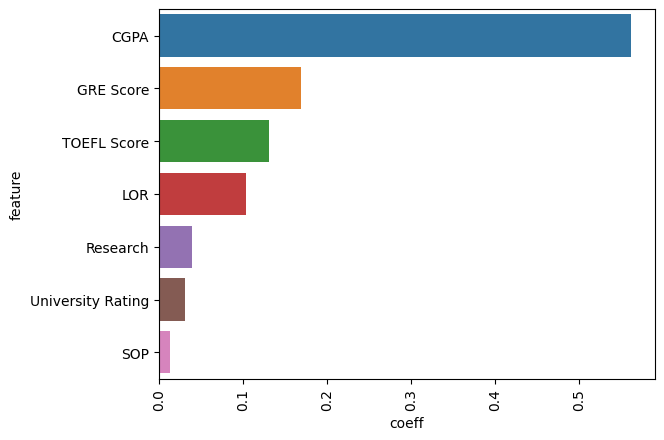

In [ ]:
weights = pd.DataFrame(list(zip(Xtest.columns,np.abs(results.params[1:]))),
                   columns=['feature', 'coeff'])
weights.sort_values(by = "coeff", ascending = False, inplace = True)
sns.barplot(y='feature', x='coeff', data=weights)
plt.xticks(rotation=90)
plt.show()

* CGPA is the most important Feature for predicting "Chance of Admit"
* Next comes  GRE Score, TOEFL Score, LOR
* Research, University Rating & SOP has least effect for Predicting "Chance of Admit"

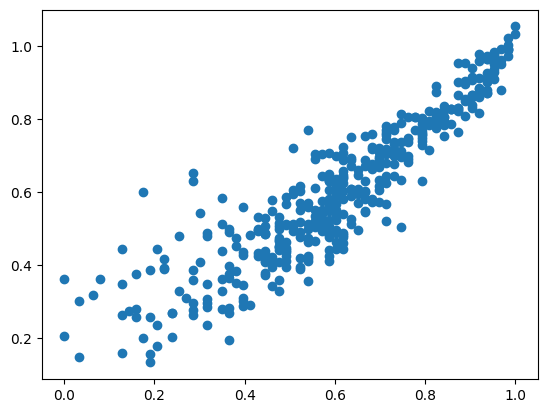

In [ ]:
plt.scatter(ytrain, yhattrain)

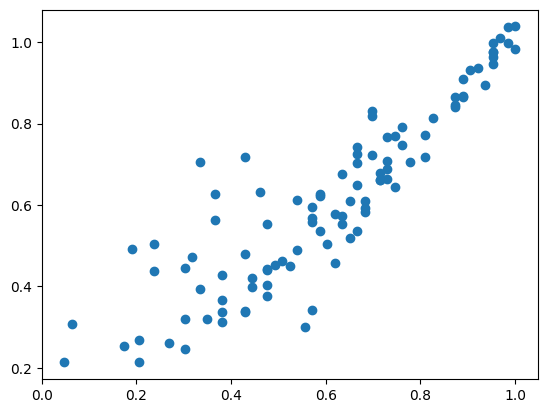

In [ ]:
plt.scatter(ytest, yhattest)

* from Yhat and yactual plot we can say , model is predicting good

* Now lets check R-square of Testing & Training data

## R-Square

In [ ]:
# R-square Using OLS Attribute for Training data
results.rsquared

0.8292848575410212

In [ ]:
# R-square for training data
1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)

0.8292848575410212

In [ ]:
# R-square for testing data
1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)

0.7927364356781469

* **From R-square Values of Test & Train Data, we can say model is neither Overfit nor Underfit**
* **It is appropriately Fit**

## R-Square Adjusted

In [ ]:
# used defined function for R-Square Adjusted
def R2adj(X,R2):
  return (1 - (1-R2) * ((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))

In [ ]:
R2adj(Xtrain,results.rsquared)

0.8262363728542538

In [ ]:
# R-square adjusted Using OLS Attribute for Training data
results.rsquared_adj

0.8262363728542538

In [ ]:
# R-square adjusted for training data
R2= 1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)
1 - (1-R2) * ((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1))

0.8262363728542538

In [ ]:
# R-square adjusted for testing data
R2= 1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)
1 - (1-R2) * ((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))

0.7769663818710494

* **From Comparison of R-Square and R-Square Adjusted, we see difference b/w R-Square & R-Square adj for Training [0.829 - 0.826 = 0.003] , for testing [ 0.792 - 0.776 = 0.016] is very small**
* **So we can conclude there are no irrelevant features inline with our earlier Hypothesis Testing**

## Mean Absolute Error

In [ ]:
# MAE for Training data
(np.sum(np.abs(ytrain-yhattrain)))/len(ytrain)

0.06568270842637872

In [ ]:
# MAE for testing data
(np.sum(np.abs(ytest-yhattest)))/len(ytest)

0.07509931877554368

* Both Test & Train data MAE Values are very low meaning our model is performing good

## Root Mean Square Error

In [ ]:
# RMSE for Training data
((np.sum((ytrain-yhattrain)**2))**0.5)/len(ytrain)

0.004579977329232789

In [ ]:
# RMSE for testing data
((np.sum((ytest-yhattest)**2))**0.5)/len(ytest)

0.010564357955452694

* Both Test & Train data RMSE Values are very low meaning our model is performing good

# **Check Assumptions of Linear Regression**

## VIF

* Below is Iterative code for removing High VIF features by maintaining threshold for VIF<=5 [iterates code till none of features VIF >5

In [ ]:
vif_thr =5
r2_thr = 0 # focusing only on VIF irrepsctive of feature removal effect on R-Square Adj
j = 1
feats_removed = []
cols2 = Xtrain.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(ytrain), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', j-1)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print()
print("*******************************************************************************************************************************")
print()
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values
print(vif)
print(sm_model.summary())

Reached threshold
Highest vif: Features     LOR
VIF         2.53
Name: 0, dtype: object
Current adj.R2 0.29447764265596066
Features removed: 5
List of features removed: ['CGPA', 'TOEFL Score', 'SOP', 'GRE Score', 'University Rating']

*******************************************************************************************************************************

   Features   VIF
0       LOR  2.53
1  Research  2.53
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           3.16e-32
Time:                        16:34:14   Log-Likelihood:                 105.27
No. Observations:                 400   AIC:                            -206.5
Df Residuals:                

* By focusing only on VIF Score < 5 -->  five Feaures ['CGPA', 'TOEFL Score', 'SOP', 'GRE Score', 'University Rating'] have been Removed
* As a results Rsqure_adj of the model came down to 0.294 --> Not a good Model for Prediction

* Now we will focus both on VIF & R-Square Adj

* Below is Iterative code for auto removing High VIF features by maintaing threshold for **VIF<=5 & Rsquare_adj >=0.8**

In [ ]:
vif_thr =5
r2_thr = 0.8
j = 1
feats_removed = []
cols2 = Xtrain.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    if j == 1:
        print("****************************")
        print("Initial Condition")
        print("****************************")
        print(vif)
        print()

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(ytrain), X2_sm).fit()
    if (vif.iloc[0]['VIF'] <= vif_thr) or (sm_model.rsquared_adj < r2_thr):

        print("Checking VIF")
        print("****************************")
        print('Reached threshold')
        print('Highest vif :',vif.iloc[0])
        print('Current adj.R2 if Highest VIF feature removed:',sm_model.rsquared_adj)
        print('Features removed :', j-1)
        print('List of features removed :', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print("***************************************************************************")
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values

****************************
Initial Condition
****************************
            Features    VIF
5               CGPA  40.15
1        TOEFL Score  29.57
0          GRE Score  28.94
3                SOP  17.99
4                LOR  11.28
2  University Rating  10.87
6           Research   3.28

Checking VIF
****************************
Reached threshold
Highest vif : Features     CGPA
VIF         40.15
Name: 5, dtype: object
Current adj.R2 if Highest VIF feature removed: 0.7766781427005298
Features removed : 0
List of features removed : []
***************************************************************************


* CGPA  Score has very high VIF values
* But removal of these features is detoriating our Model,Bringing down Rsquare_adj to 0.776 which is less than threshold < 0.8

## Mean of Residuals

In [ ]:
np.mean(yhattrain-ytrain)

-4.929390229335695e-16

In [ ]:
np.mean(yhattest-ytest)

0.006100917484111618

* Mean of Residuals are almost equivalent to Zero

## Linearity of variables

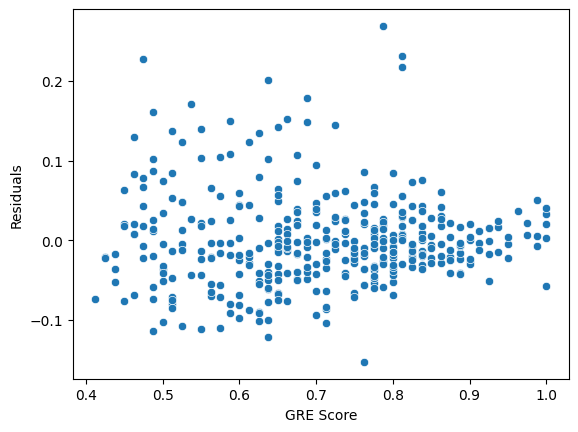

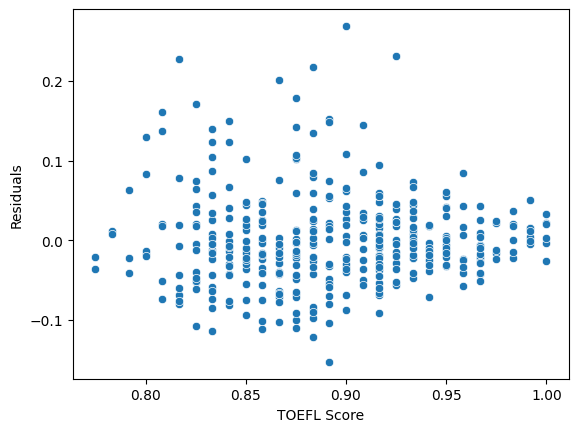

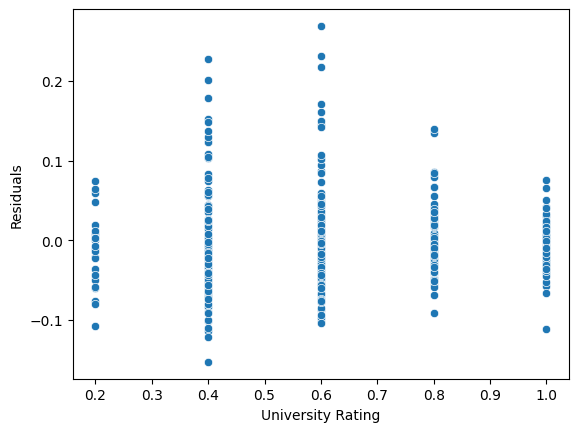

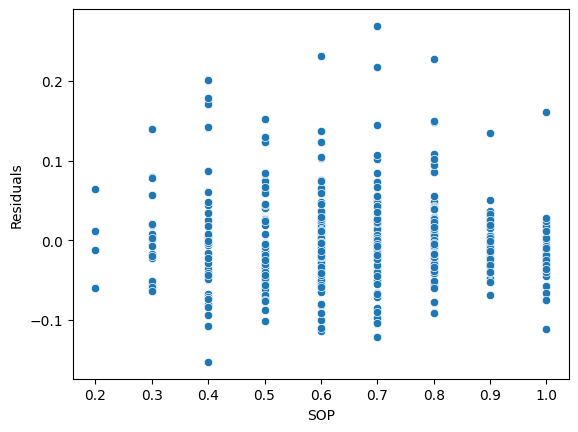

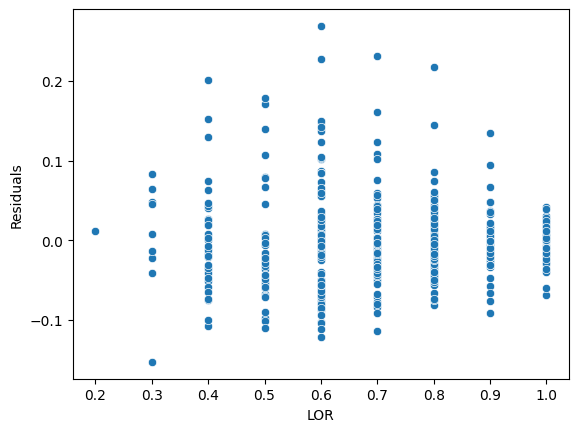

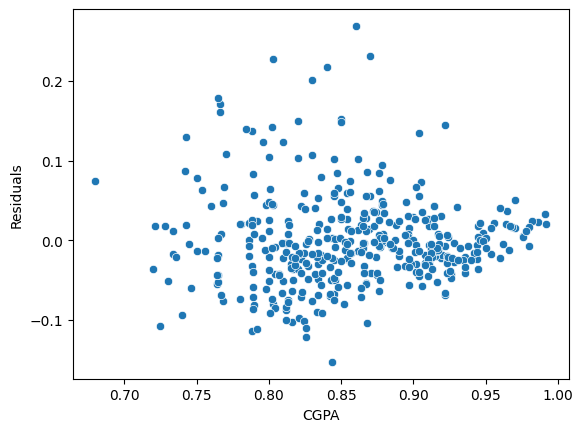

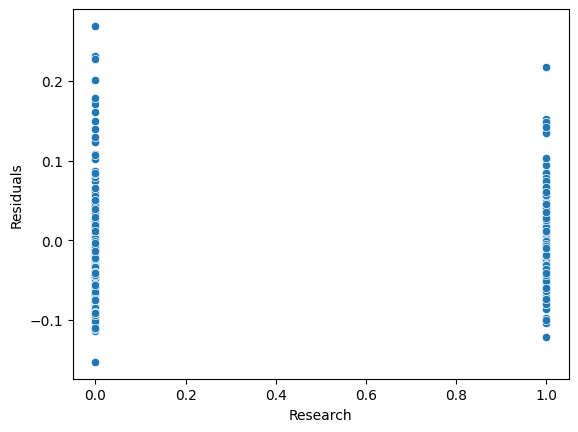

In [ ]:
for i in Xtrain.columns:
  sns.scatterplot(x=Xtrain[i],y=(yhattrain-ytrain))
  plt.xlabel(i)
  plt.ylabel("Residuals")
  plt.show()

* We can say No Rigid pattern observed for Residual w.r.t Features

## No Heteroskedasticity

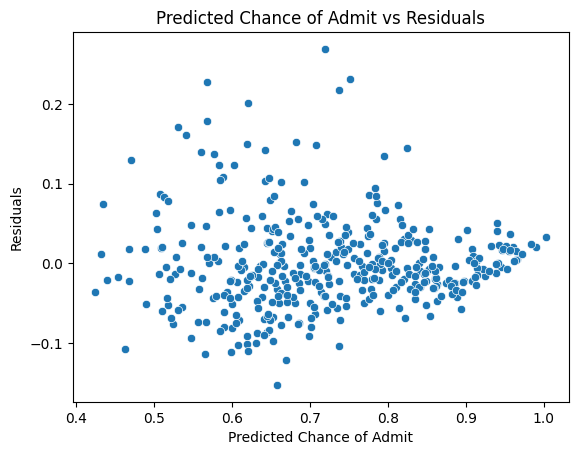

In [ ]:
sns.scatterplot(x=yhattrain,y=yhattrain-ytrain)
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted Chance of Admit vs Residuals")
plt.show()

* Very Slight Heteroskedasticity is Present
* However we can say variance is almost same for all data points

## Normality of Residuals

<Axes: ylabel='Count'>

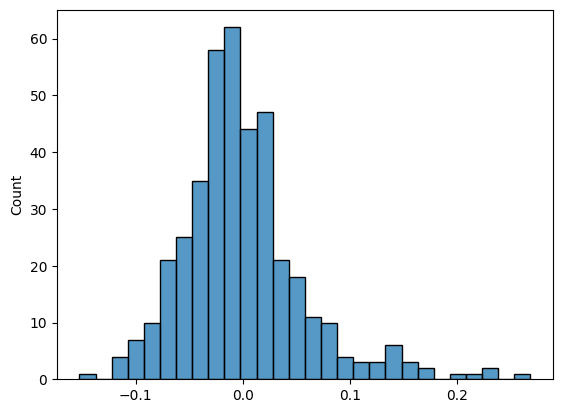

In [ ]:
sns.histplot(yhattrain-ytrain)

* Almost bell Shape curve can be Visualized
* however once we will do Hypothesis testing

lets check Normality with Shapiro test

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian

test_stat, p_value = shapiro(yhattrain-ytrain)
print(p_value)
if p_value < 0.05:
   print("Reject H0")
   print("Residuals are Not Gaussian")
else:
   print("Fail to reject H0")
   print("Residuals are Gaussian")

1.367908715986521e-12
Reject H0
Residuals are Not Gaussian


let do KS fitness of data test for Normality of Residuals

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian

test_stat, p_value = kstest(yhattrain-ytrain,stats.norm.cdf)
print(p_value)
if p_value < 0.05:
  print("Reject H0")
  print("Data is Not Gaussian")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

1.957646932600345e-65
Reject H0
Data is Not Gaussian


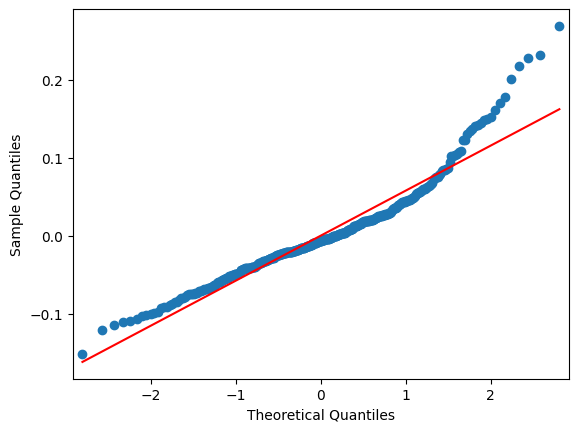

In [ ]:
trainresiduals = (yhattrain-ytrain)
qqplot(trainresiduals, line="s")
plt.show()

* Residuals are almost lying on the Normal line,
* Residuals are slightly deviated from Normal distribution

* Let us check few other Methods of how our Linear Regression model can be improved

# **Model Training - Linear Regression[Lasso]**

In [ ]:
model1 = Lasso(alpha=0.0001)
model1.fit(Xtrain,ytrain)
print(model1.intercept_)
print(model1.coef_)

0.02411503059989173
[0.16858803 0.13105956 0.03116347 0.01323098 0.10284886 0.55961982
 0.03946013]


In [ ]:
model1.score(Xtrain, ytrain)

0.8292787171347655

In [ ]:
# calculating RSquared Adjusted
R2adj(Xtrain,model1.score(Xtrain, ytrain))

0.8262301227978863

In [ ]:
model1.score(Xtest, ytest)

0.7929714474185146

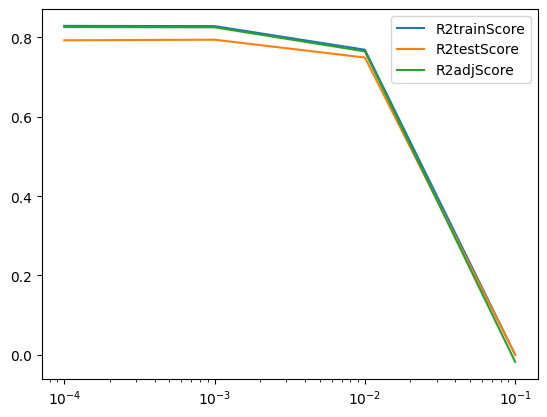

In [ ]:
# let us do L1 Regularization constant Hyperparameter Tuning
R2testScore = []
R2trainScore = []
R2adjScore=[]
hyperparameter = [0.0001,0.001,0.01,0.1]
for i in hyperparameter:
  model1 = Lasso(alpha=i)
  model1.fit(Xtrain,ytrain)

  R2 = model1.score(Xtrain,ytrain)
  R2trainScore.append(R2)
  R2testScore.append(model1.score(Xtest,ytest))
  R2adjScore.append(R2adj(Xtrain,R2))

sns.lineplot(x=hyperparameter, y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=hyperparameter, y=R2testScore , label = "R2testScore")
sns.lineplot(x=hyperparameter, y=R2adjScore , label = "R2adjScore")
plt.xscale('log')
plt.show()

* Lasso Linear_Regression is giving slightly better results with very low L1 Regularization Constant values
* we are are getting R-Square Detoriated with increase in L1 Regularization constant
* Meaning with our Earlier Linear Regression Model was good with Given 7 features, further by increasing Regularization we are detoriating our model by increasing underfitting

# **Model Training - Linear Regression[Ridge]**

In [ ]:
model2 = Ridge(alpha = 0.001)
model2.fit(Xtrain,ytrain)
print(model2.intercept_)
print(model2.coef_)

0.022438486565023008
[0.16918593 0.13146555 0.03074948 0.01361192 0.1032931  0.56138234
 0.03924791]


In [ ]:
model2.score(Xtrain, ytrain)

0.82928485385645

In [ ]:
model2.score(Xtest, ytest)

0.7927324857587962

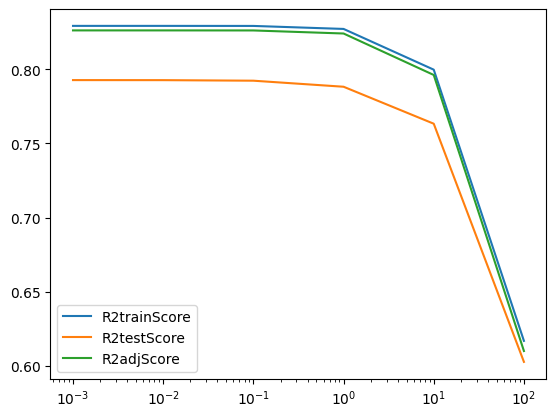

In [ ]:
# let us do L1 Regularization constant Hyperparameter Tuning
R2testScore = []
R2trainScore = []
R2adjScore=[]
hyperparameter = [0.001,0.01,0.1,1,10,100]
for i in hyperparameter:
  model2 = Ridge(alpha=i)
  model2.fit(Xtrain,ytrain)

  R2 = model2.score(Xtrain,ytrain)
  R2trainScore.append(R2)
  R2testScore.append(model2.score(Xtest,ytest))
  R2adjScore.append(R2adj(Xtrain,R2))

sns.lineplot(x=hyperparameter, y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=hyperparameter, y=R2testScore , label = "R2testScore")
sns.lineplot(x=hyperparameter, y=R2adjScore , label = "R2adjScore")
plt.xscale('log')
plt.show()

* we are are getting R-Square Detoriated with increase in L2 Regularization constant
* Meaning with our Earlier Linear Regression Model was good with Given 7 features, further by increasing Regularization we are detoriating our model by underfitting
* so now we will use Polynomial Feature and check if our Linear Regression Model can be further Increased

# **Polynomial Regression**

* Let us check if Different Polynomial will increase Rsquare & Rsquare_adj

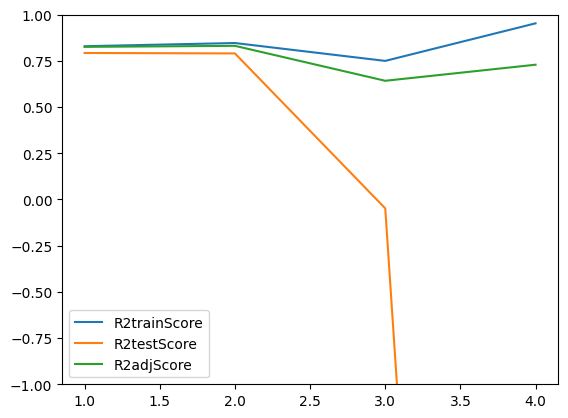


R-Square is Highest for Polynomial degree 2
R-Square train for polynomial degree  2 is 0.8466102416728243
R-Square adj for polynomial degree  2 is 0.8313980342354185
R-Square test polynomial degree  2 is 0.7903261619660935


In [ ]:
R2testScore = []
R2trainScore = []
R2adjScore=[]
poly_hyper = np.arange(1,5) # Polynomial Degree Hyperparamter
for i in poly_hyper:
  poly = PolynomialFeatures(i)
  Xtrainpoly = poly.fit_transform(Xtrain)
  Xtestpoly = poly.fit_transform(Xtest)
  model4 = LinearRegression()
  model4.fit(Xtrainpoly,ytrain)

  R2 = model4.score(Xtrainpoly,ytrain)
  R2trainScore.append(R2)
  R2testScore.append(model4.score(Xtestpoly,ytest))
  R2adjScore.append(R2adj(Xtrainpoly,R2))



sns.lineplot(x=poly_hyper, y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=poly_hyper, y=R2testScore , label = "R2testScore")
sns.lineplot(x=poly_hyper, y=R2adjScore , label = "R2adjScore")
plt.ylim((-1,1))
plt.show()

print()
maxR2poly = poly_hyper[np.argmax(R2adjScore)]
print("R-Square is Highest for Polynomial degree", maxR2poly)
print("R-Square train for polynomial degree ", maxR2poly , "is",R2trainScore[maxR2poly-1])
print("R-Square adj for polynomial degree ", maxR2poly , "is",R2adjScore[maxR2poly-1])
print("R-Square test polynomial degree ", maxR2poly , "is",R2testScore[maxR2poly-1])



* Linear Regression Model is performing better with 2nd Degree Polynomial, further when degree increase it is leading to Overfit resulting in bad results for Testing data

* Further we will do L1 Regularization to on polynomial Features to to check if model performance can be further increased by reducing overfitting problem in higher polynomials

<ipython-input-122-9092dd31f8db>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model5.fit(Xtrainpoly,ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+00, tolerance: 1.966e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


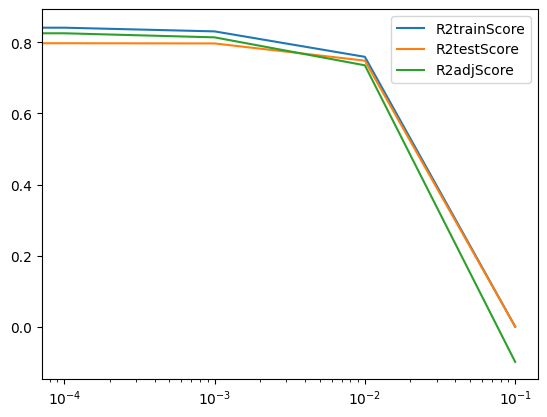


R-Square is Highest for L1 Regularization Constant 0
R-Square train : 0.8464417191143481
R-Square adj : 0.8312127986959363
R-Square test : 0.7877397175497122


In [ ]:
R2testScore = []
R2trainScore = []
R2adjScore=[]
hyperparameter = [ 0,0.0001,0.001,0.01,0.1] # L1 Regularization Constant
for i in hyperparameter:


  poly = PolynomialFeatures(2)
  Xtrainpoly = poly.fit_transform(Xtrain)
  Xtestpoly = poly.fit_transform(Xtest)
  model5 = Lasso(alpha=i)
  model5.fit(Xtrainpoly,ytrain)

  R2 = model5.score(Xtrainpoly,ytrain)
  R2trainScore.append(R2)
  R2testScore.append(model5.score(Xtestpoly,ytest))
  R2adjScore.append(R2adj(Xtrainpoly,R2))

sns.lineplot(x=hyperparameter, y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=hyperparameter, y=R2testScore , label = "R2testScore")
sns.lineplot(x=hyperparameter, y=R2adjScore , label = "R2adjScore")
plt.xscale('log')
plt.show()

print()
maxR2hyper = hyperparameter[np.argmax(R2adjScore)]
print("R-Square is Highest for L1 Regularization Constant", maxR2hyper)
print("R-Square train :",R2trainScore[np.argmax(R2adjScore)])
print("R-Square adj :",R2adjScore[np.argmax(R2adjScore)])
print("R-Square test :",R2testScore[np.argmax(R2adjScore)])

In [ ]:
R2trainScore=[]
R2testScore=[]
R2adjtrainScore = []
X = data.drop(["Chance of Admit"], axis = 1)
y = data["Chance of Admit"]
for i in range(1,5):
  poly = PolynomialFeatures(i)
  Xpoly = poly.fit_transform(X)
  Normscaler = MinMaxScaler()
  scaledXpoly = Normscaler.fit_transform(Xpoly)

  Xtrain, Xtest, ytrain, ytest = train_test_split(scaledXpoly, y, test_size=0.2, random_state=2)
  Xtestpoly = poly.fit_transform(Xtest)
  model4 = LinearRegression()
  model4.fit(Xtrain,ytrain)
  R2 = model4.score(Xtrain,ytrain)
  R2trainScore.append(R2)
  R2adjtrainScore.append((1 - (1-R2) * ((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1))))
  R2testScore.append(model4.score(Xtest,ytest))

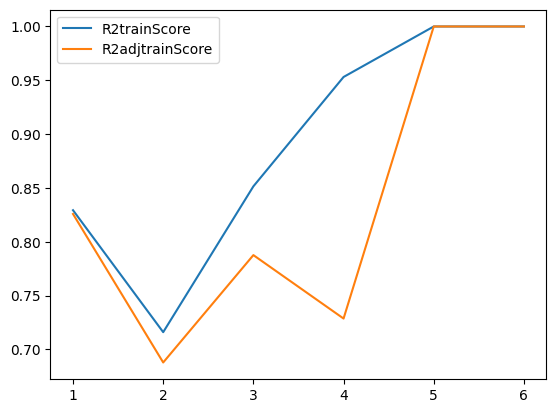

In [ ]:
sns.lineplot(x=np.arange(1,7), y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=np.arange(1,7), y=R2adjtrainScore , label = "R2adjtrainScore")
plt.show()

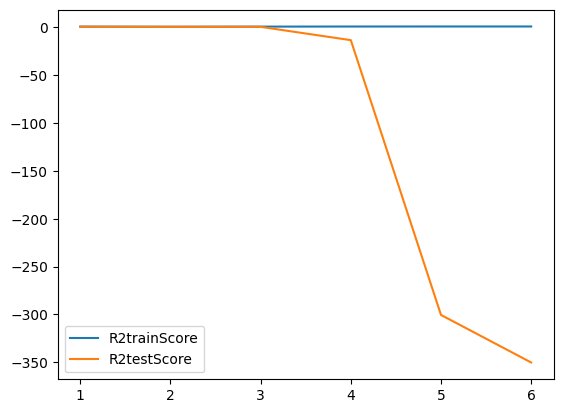

In [ ]:
sns.lineplot(x=np.arange(1,7), y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=np.arange(1,7), y=R2testScore , label = "R2testScore")
plt.show()

In [ ]:
R2trainScore

[0.8292848575410212,
 0.7159751219943793,
 0.8514607669622795,
 0.9530698707269925,
 1.0,
 1.0]

In [ ]:
R2adjtrainScore

[0.825791964600684,
 0.6878073654979542,
 0.7875729247955179,
 0.7286214263778259,
 1.0,
 1.0]

In [ ]:
R2testScore

[0.792736435678147,
 0.6681117315182176,
 0.6093621712447559,
 -13.29234121745116,
 -300.5896666152779,
 -350.2750560013047]

* Definetely with use of Polynomial X, Model is Over fitting
* we will have to use regulaization, so we will use Ridge

In [ ]:
R2trainScore=np.zeros([6,6])
R2testScore= np.zeros([6,6])
R2adjtrainScore = np.zeros([6,6])
for i in range(1,7):
  poly = PolynomialFeatures(i)
  Xtrainpoly = poly.fit_transform(Xtrain)
  Xtestpoly = poly.fit_transform(Xtest)
  for j in range(1,7):
    model5 = Ridge(alpha = j)
    model5.fit(Xtrainpoly,ytrain)
    R2 = model5.score(Xtrainpoly,ytrain)
    R2trainScore[i-1][j-1] = R2
    R2adjtrainScore[i-1][j-1] = ((1 - ((1-R2) * ((Xtrainpoly.shape[0]-1)/(Xtrainpoly.shape[0]-Xtrainpoly.shape[1]-1)))))
    R2testScore[i-1][j-1] = (model5.score(Xtestpoly,ytest))

In [ ]:
R2trainScore

array([[0.79687427, 0.77955226, 0.76677938, 0.75619787, 0.74702864,
        0.73886741],
       [0.82561742, 0.81823326, 0.81253425, 0.80791434, 0.80402095,
        0.80063612],
       [0.83255246, 0.82780645, 0.82444488, 0.82167028, 0.81924838,
        0.81707799],
       [0.83770864, 0.83319803, 0.83019078, 0.82786385, 0.82592682,
        0.82424351],
       [0.84163294, 0.8375332 , 0.83469506, 0.83248519, 0.83065963,
        0.82909371],
       [0.84442262, 0.84070408, 0.83816909, 0.83615272, 0.83445375,
        0.83297716]])

<Axes: >

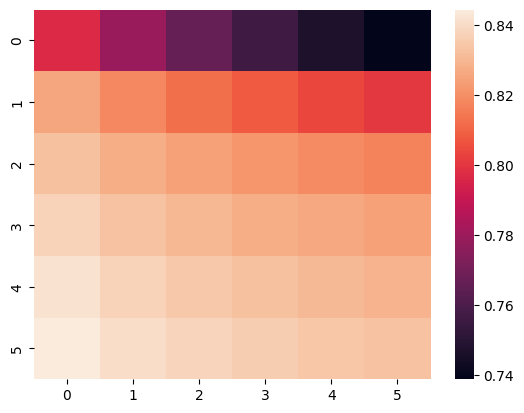

In [ ]:
sns.heatmap(data = R2trainScore)

In [ ]:
R2adjtrainScore

array([[ 0.79264932,  0.77495745,  0.76191368,  0.75110787,  0.74174385,
         0.7334087 ],
       [ 0.80819008,  0.80007628,  0.79381001,  0.78872884,  0.78444621,
         0.78072282],
       [ 0.7603583 ,  0.75356582,  0.74875571,  0.7447859 ,  0.74132069,
         0.73821522],
       [ 0.06087143,  0.03479095,  0.01738857,  0.0039189 , -0.00729492,
        -0.01703993],
       [ 1.16090498,  1.16506132,  1.16794102,  1.17018452,  1.1720386 ,
         1.17362942],
       [ 1.0471707 ,  1.04829593,  1.04906289,  1.04967314,  1.05018751,
         1.05063468]])

<Axes: >

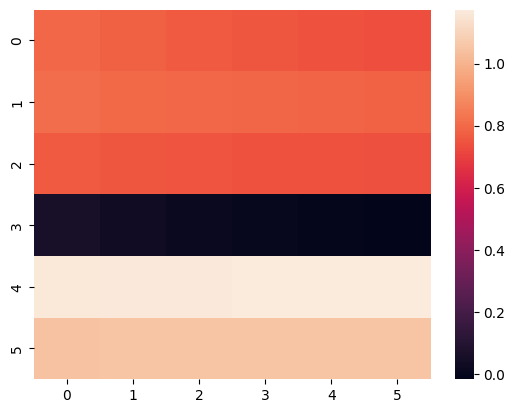

In [ ]:
sns.heatmap(data = R2adjtrainScore)

# **Bussiness Insights**

* All the student applied are meritorious
** CGPA of the Student are >= 7.0
** GRE Scores are greater than 290, More No of Data points are in that range 310 ~ 327
** TOEFL Scores are greater than 91, More No of Data points are in that range 99~112
* All features have Positive correlation with "Chance of Admit"
** CGPA[0.88],GRE Score[0.81],TOEFL Score[0.79] has very high correlation with "Chance of Admit"
** Further SOP[0.68], LOR[0.65] has almost same Correlation with ""Chance of Admit"
** Comparatively Low Correlation is found w.r.t Reasearch & "Chance of Admit"[0.55], However is positively impactful
* From Stats OLS model Summary R- Squared is 0.829 and R-Squared Adj is 0.826, from which we can say all the features in the model are relevant
** CGPA is the most important & Significant Feature for predicting "Chance of Admit"
** Next singificant feature in decreasing order comes: GRE Score, TOEFL Score, LOR
** Research, University Rating & SOP are less signifcant  for Predicting "Chance of Admit"
* From R-square Values of Train[0.829] & Test Data[0.792], we can say model is neither Overfit nor Underfit, It is Best Fit
* All Assumpitions of Linear Regression are almost Satisfied
* Further Use Regularization of Constant with Lasso and Ridge did not show much improvement as our OLS model is already Best Fit
* However use of 2nd degree Polynomial feature very slightly improved Rsquare Adj from 0.826 --> 0.831





# **Recommendations**

* In order to improve the Model Following additional Features can be added
** Under graduation College Rating
** Extra Circular activity with an Unified Rating
** Personal Essay Rating
** Professional Working Experience
** Financial Status

* further we can get actual data of Admission [yes or No] of past History records  to understand the Actual Threshold for "Chance of Admit" to definetely get admitted

* With the help of above model, Jamboree can confidently guide the Students with exact course of action meaning what score/rating to improve to get admission to particular college
